### **For this assignment the only permitted libraries to use are Numpy, Scipy, MatplotLib and Pandas! All four have been imported for you in this Notebook.**

### (notebook code needs to be rerun)

In [2]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [3]:
train_file_path = 'resources/lab1_train.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')

# Convert Timestamp column to datetime
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Get overview of dataset
print(train_data)

                 Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0      2015-12-22 16:00:00  2.470294  261.5804      2     2     1  244.3284   
1      2015-12-22 16:00:01  2.457163  261.1879      2     2     1  244.3284   
2      2015-12-22 16:00:02  2.439548  260.9131      2     2     1  244.3284   
3      2015-12-22 16:00:03  2.428338  260.2850      2     2     1  244.3284   
4      2015-12-22 16:00:04  2.424815  259.8925      2     2     1  244.4245   
...                    ...       ...       ...    ...   ...   ...       ...   
496795 2015-12-28 09:59:55  2.460366  523.0430      2     2     1  262.0161   
496796 2015-12-28 09:59:56  2.448836  522.9645      2     2     1  262.0161   
496797 2015-12-28 09:59:57  2.434744  522.8860      2     2     1  262.0161   
496798 2015-12-28 09:59:58  2.428338  522.9252      2     2     1  262.0161   
496799 2015-12-28 09:59:59  2.427057  522.8467      2     2     1  262.0161   

          AIT202    AIT203    FIT201  ...  P501  P5

In [4]:
test_file_path = 'resources/lab1_test.csv'

test_data = pd.read_csv(test_file_path, delimiter=',')

# Convert Timestamp column to datetime
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Get overview of dataset
print(test_data)

                 Timestamp    FIT101    LIT101   MV101  P101  P102    AIT201  \
0      2015-12-28 10:00:00  2.427057  522.8467       2     2     1  262.0161   
1      2015-12-28 10:00:01  2.446274  522.8860       2     2     1  262.0161   
2      2015-12-28 10:00:02  2.489191  522.8467       2     2     1  262.0161   
3      2015-12-28 10:00:03  2.534350  522.9645       2     2     1  262.0161   
4      2015-12-28 10:00:04  2.569260  523.4748       2     2     1  262.0161   
...                    ...       ...       ...     ...   ...   ...       ...   
449914 2016-01-02 14:59:55  2.559972  519.5495       2     2     1  168.0979   
449915 2016-01-02 14:59:56  2.549082  520.4131       2     2     1  168.0979   
449916 2016-01-02 14:59:57  2.531467  520.6878       2     2     1  168.0979   
449917 2016-01-02 14:59:58  2.521218  520.7271       2     2     1  168.0979   
449918 2016-01-02 14:59:59  2.501681  521.1196       2     2     1  168.0979   

          AIT202    AIT203    FIT201  .

# Familiarization

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')
                 Timestamp    FIT101    LIT101  MV101  P101  P102    AIT201  \
0      2015-12-22 16:00:00  2.470294  261.5804      2     2     1  244.3284   
1      2015-12-22 16:00:01  2.457163  261.1879      2     2     1  244.3284   
2      2015-12-22 16:00:02  2.439548  260.9131      2     2     1  244.3284   
3      2015-12-22 16:00:03  2.428338  260.2850      2     2     1  244.3284   
4      2015-12-22 16:00:04  2.

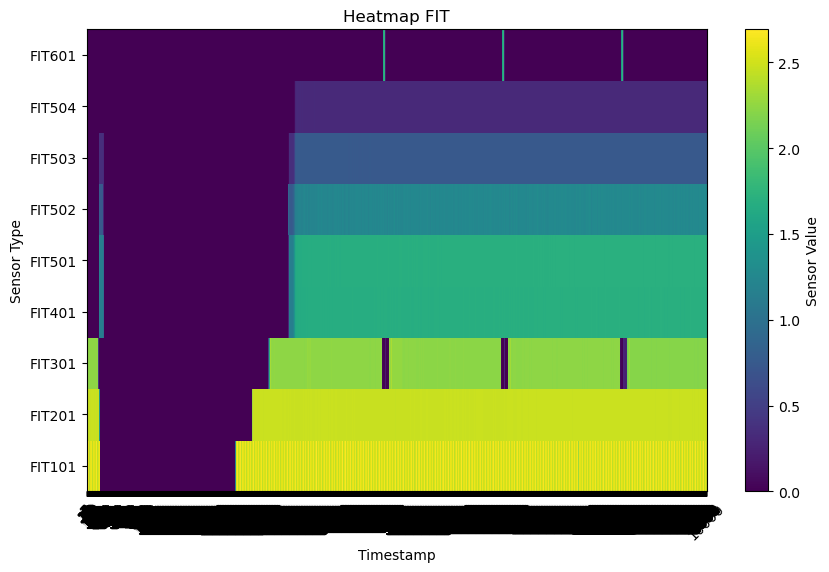

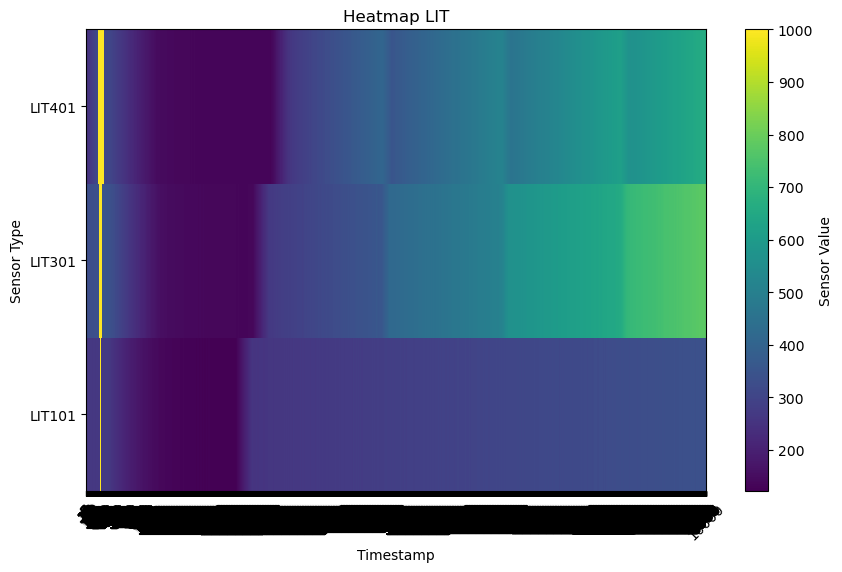

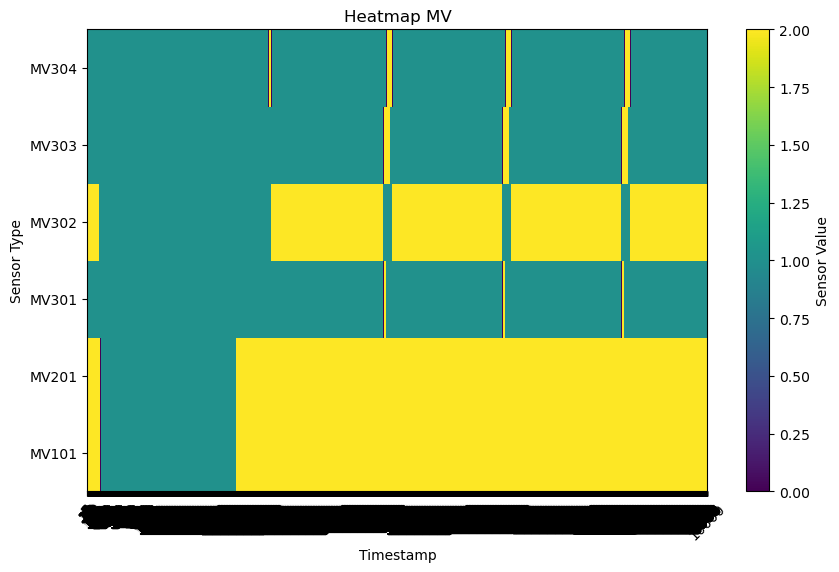

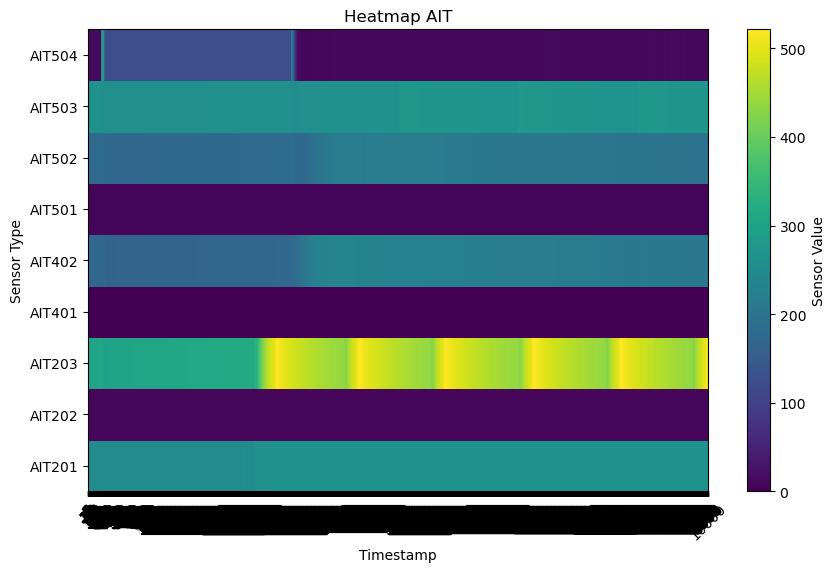

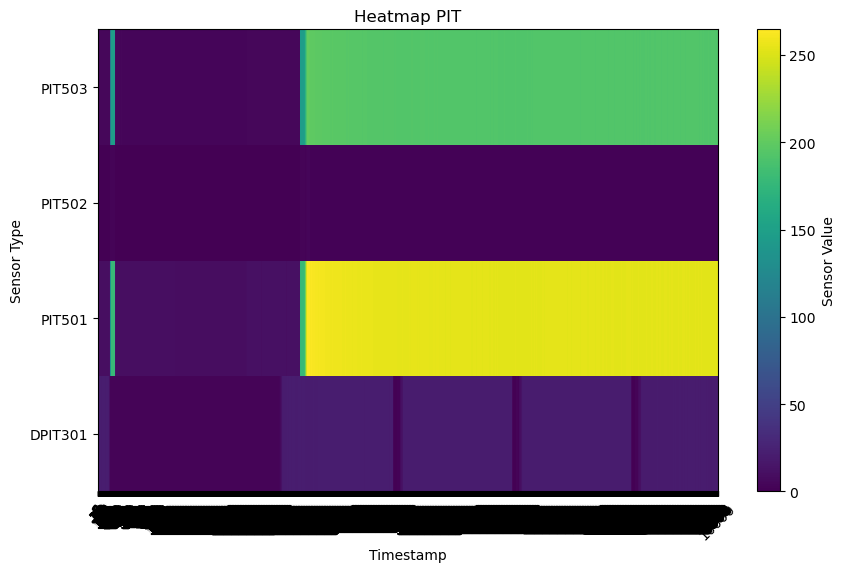

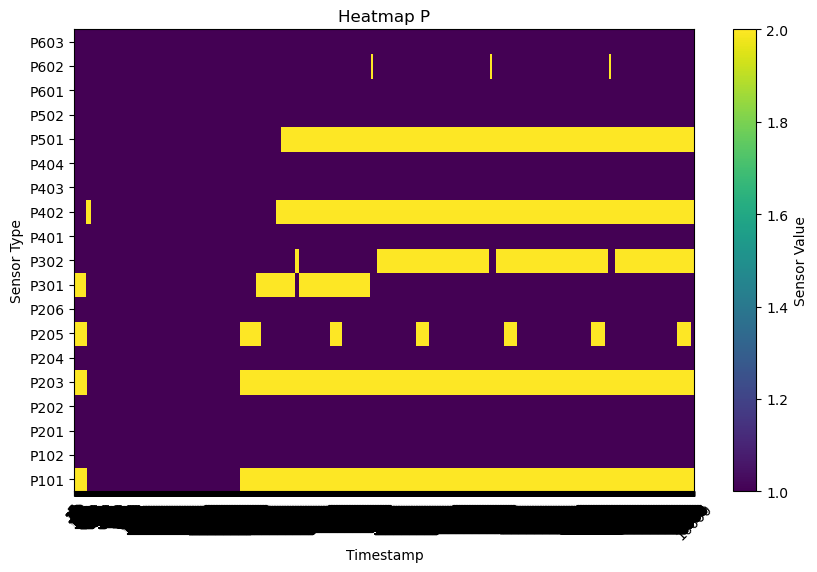

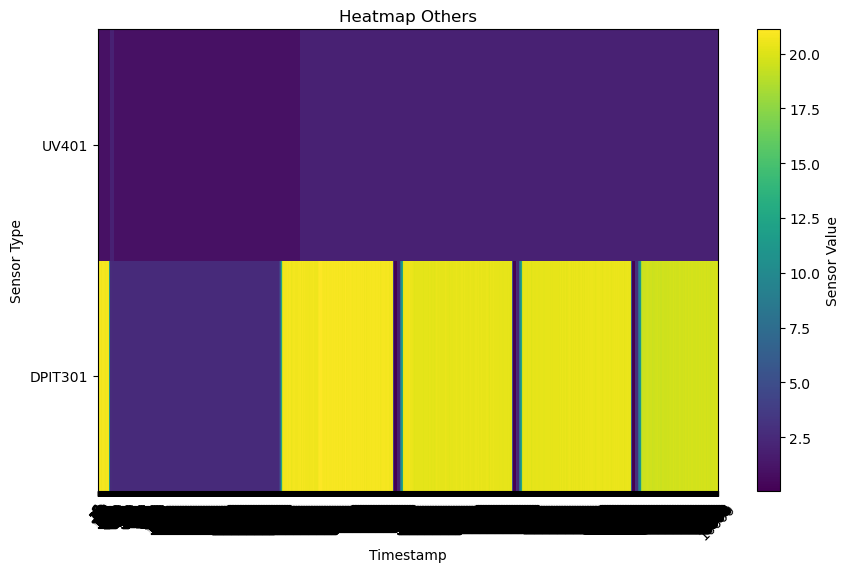

In [5]:
# ----- Familiarization -----

print(train_data.columns)

heatmap_data = train_data.drop(columns=['Normal/Attack']) # Label column not needed since its always Normal
print(heatmap_data)

# Setup dataframe for each initials of sensor types (e.g. 'FIT', 'LIT', 'MV')
# And then create heatmap for each

# List of sensor type initials and their corresponding column conditions
sensor_types = [
    ('FIT', lambda col: col.str.contains('FIT')),
    ('LIT', lambda col: col.str.contains('LIT')),
    ('MV', lambda col: col.str.contains('MV')),
    ('AIT', lambda col: col.str.contains('AIT')),
    ('PIT', lambda col: col.str.contains('PIT')),
    ('P', lambda col: col.str.contains('P') & (col.str.len() == 4)),
    ('Others', lambda col: col.str.contains('DPIT|UV'))
]

# Generate heatmaps
for sensor_type, condition in sensor_types:

    filtered_data = heatmap_data.loc[:, condition(heatmap_data.columns)]
    filtered_data = pd.concat([heatmap_data['Timestamp'], filtered_data], axis=1)
    filtered_data = filtered_data.iloc[:10000, :]
    filtered_data.set_index('Timestamp', inplace=True)
    filtered_data = filtered_data.T
    
    # Plot heatmap
    plt.figure(figsize=(10, 6))
    plt.pcolor(filtered_data, cmap='viridis')
    plt.colorbar(label='Sensor Value')
    plt.yticks(np.arange(0.5, len(filtered_data.index), 1), filtered_data.index)
    plt.xticks(np.arange(0.5, len(filtered_data.columns), 1))
    plt.title(f'Heatmap {sensor_type}')
    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Type')
    plt.xticks(rotation=45)
    plt.show()

/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


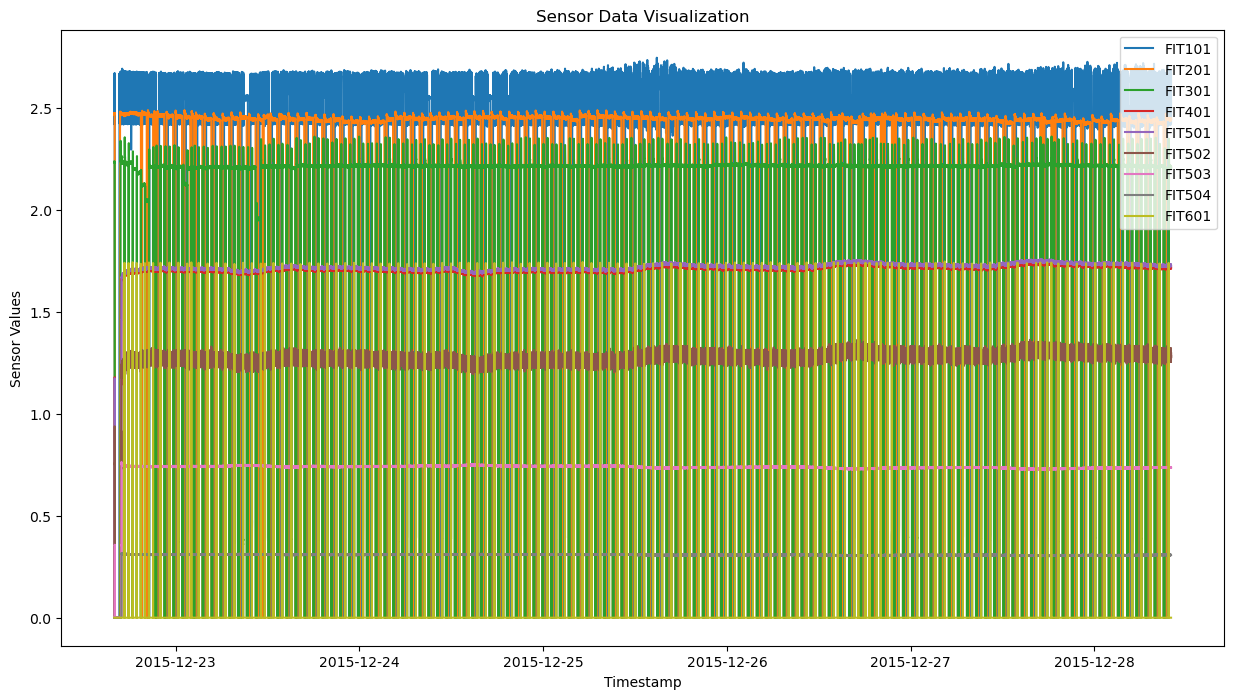

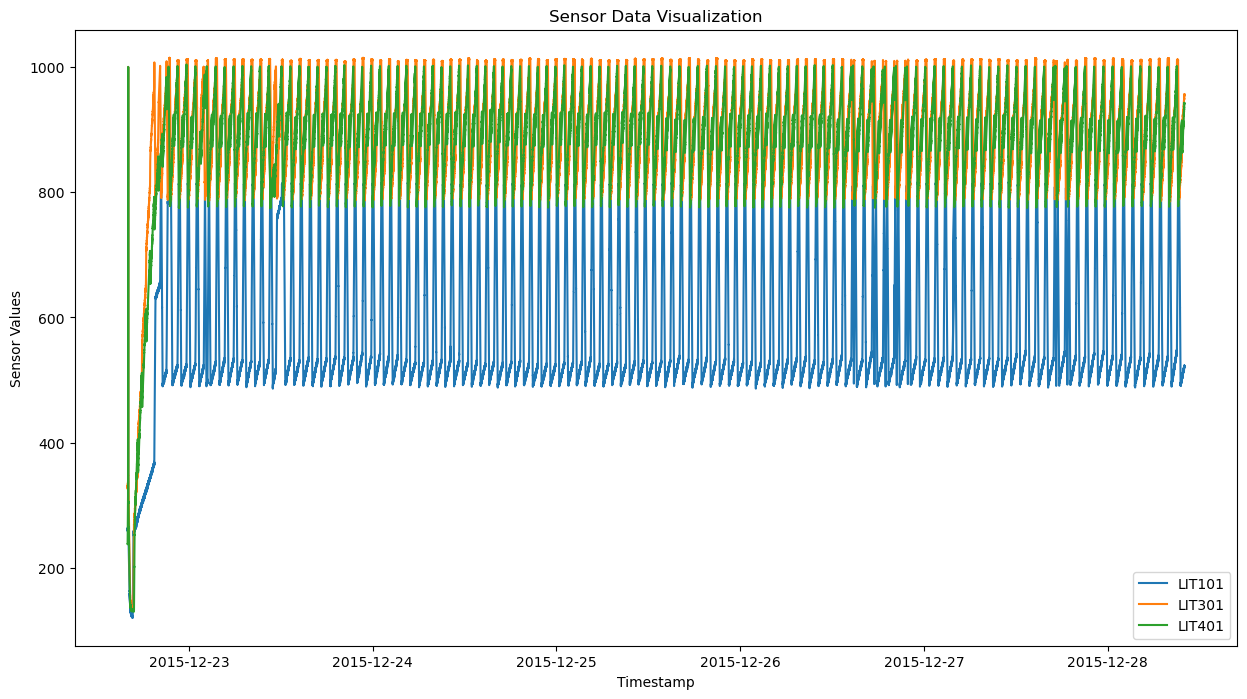

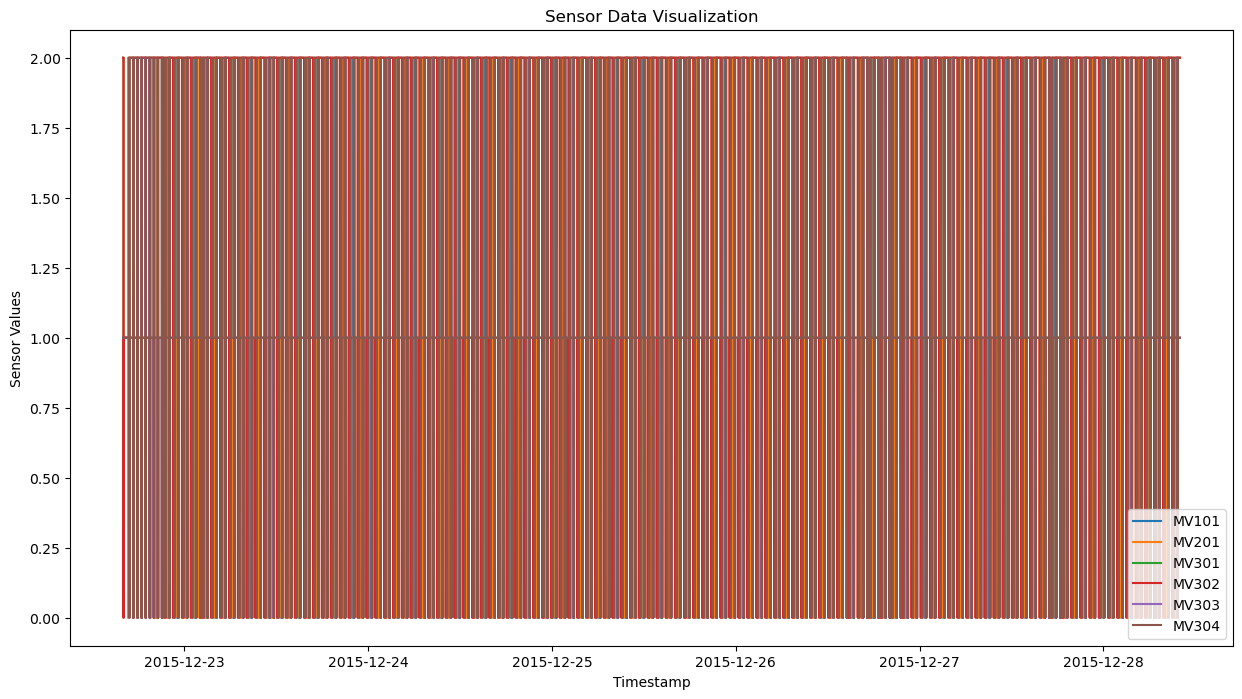

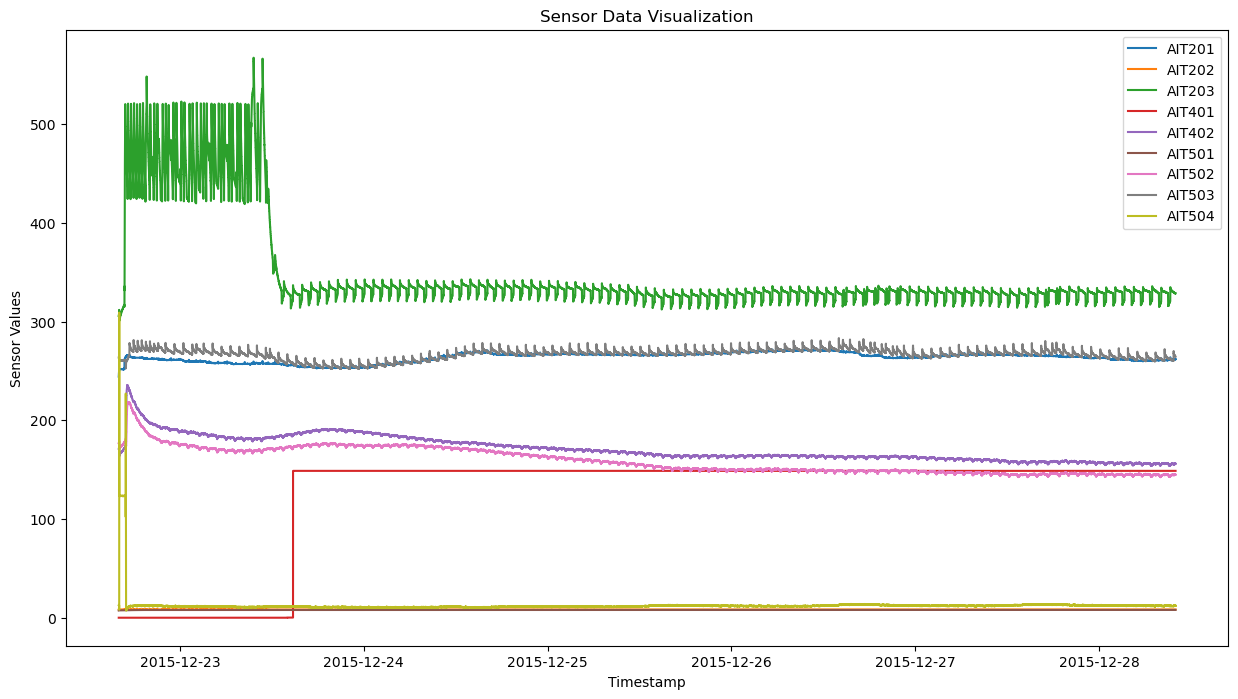

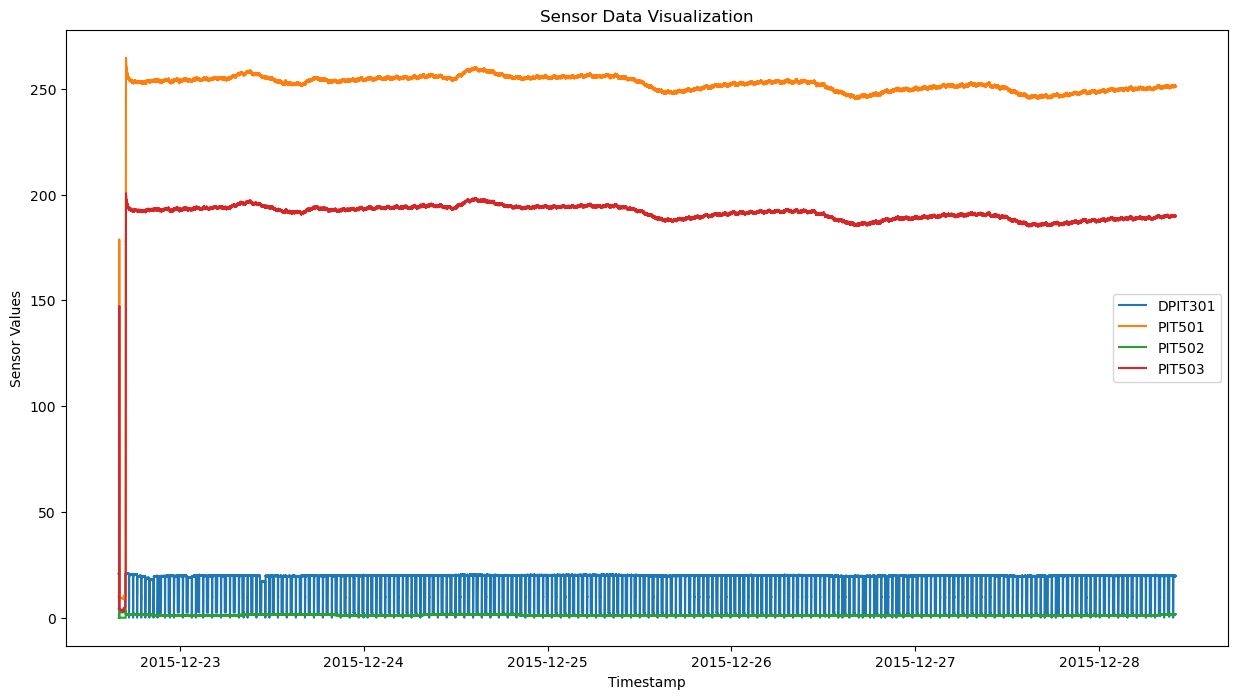

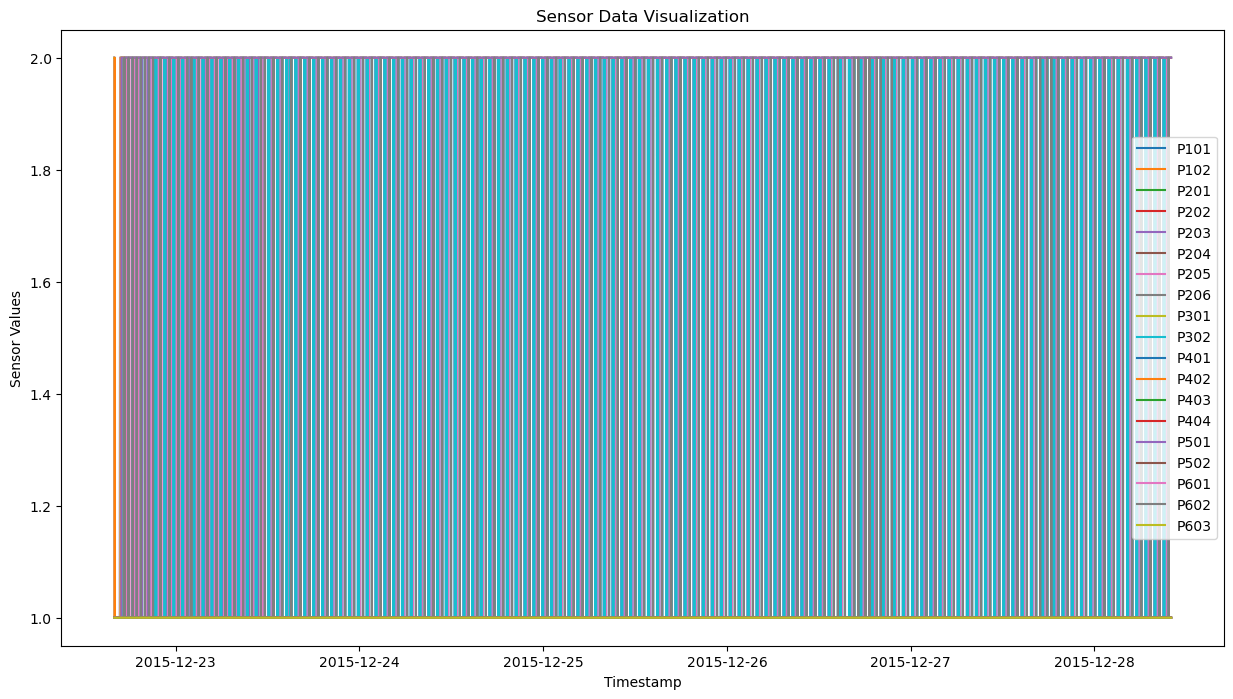

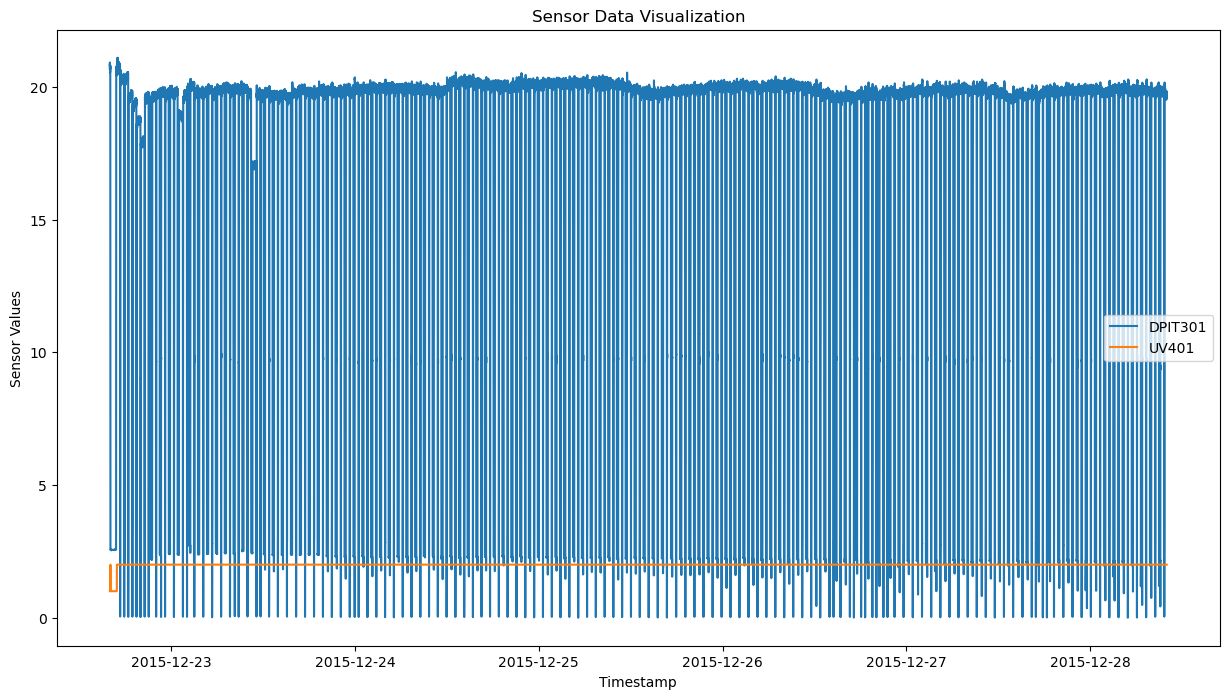

In [6]:
def visualize_sensor_data(df, window=None, sensors=None):
    # If window is None, visualize the entire dataset
    if window is None:
        start_index, end_index = 0, len(df)
    else:
        start_index, end_index = window

    # If sensors is None, select all sensor columns
    if sensors is None:
        sensors = df.columns[1:-1]

    # Plot each sensor in a different color
    plt.figure(figsize=(15, 8))
    for sensor in sensors:
        plt.plot(df['Timestamp'][start_index:end_index], df[sensor][start_index:end_index], label=sensor)

    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Values')
    plt.title('Sensor Data Visualization')
    plt.legend()

    plt.show()

# Graphs for train data

sensors_FIT = [col for col in train_data.columns if 'FIT' in col]
sensors_LIT = [col for col in train_data.columns if 'LIT' in col]
sensors_MV = [col for col in train_data.columns if 'MV' in col]
sensors_AIT = [col for col in train_data.columns if 'AIT' in col]
sensors_PIT = [col for col in train_data.columns if 'PIT' in col]
sensors_P = [col for col in train_data.columns if 'P' in col and len(col) == 4]
sensors_others = ['DPIT301', 'UV401']

visualize_sensor_data(train_data, window=None, sensors=sensors_FIT)
visualize_sensor_data(train_data, window=None, sensors=sensors_LIT)
visualize_sensor_data(train_data, window=None, sensors=sensors_MV)
visualize_sensor_data(train_data, window=None, sensors=sensors_AIT)
visualize_sensor_data(train_data, window=None, sensors=sensors_PIT)
visualize_sensor_data(train_data, window=None, sensors=sensors_P)
visualize_sensor_data(train_data, window=None, sensors=sensors_others)

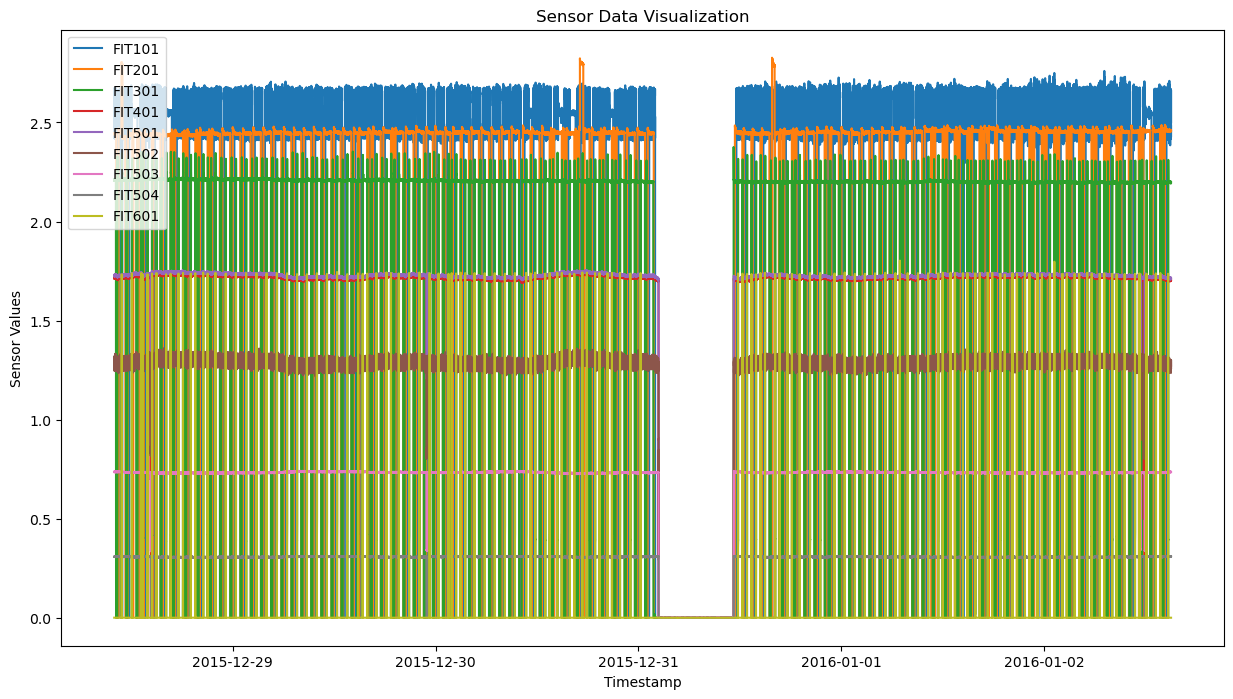

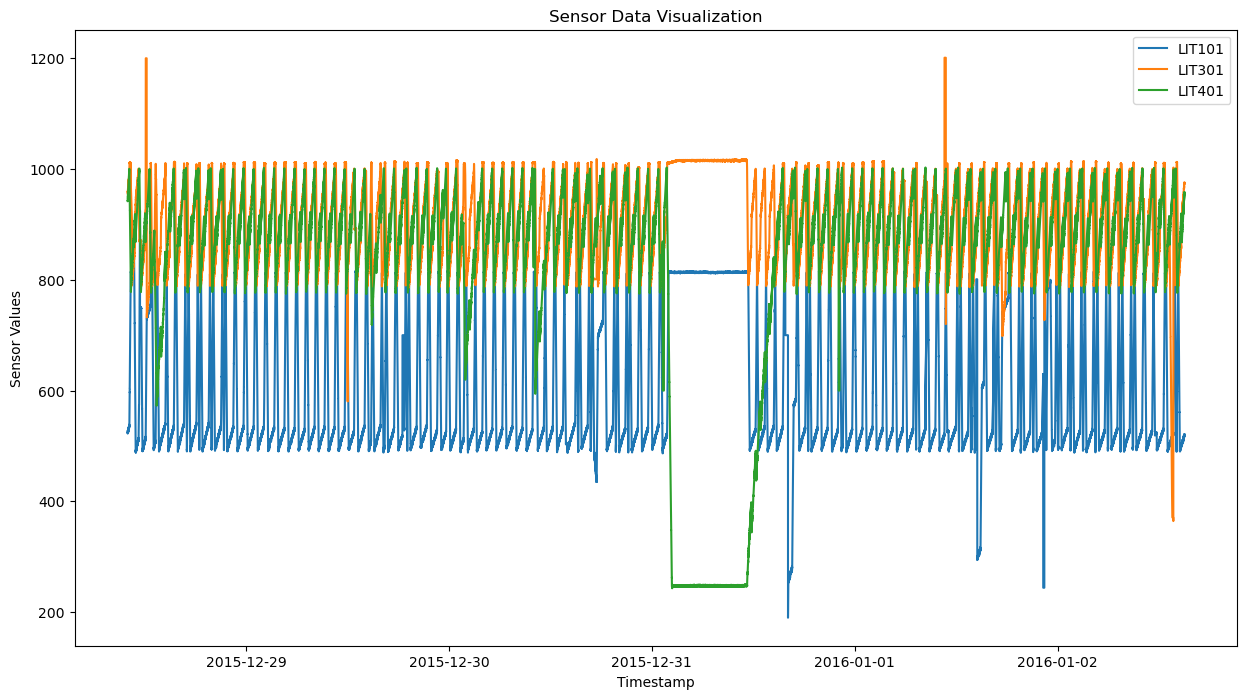

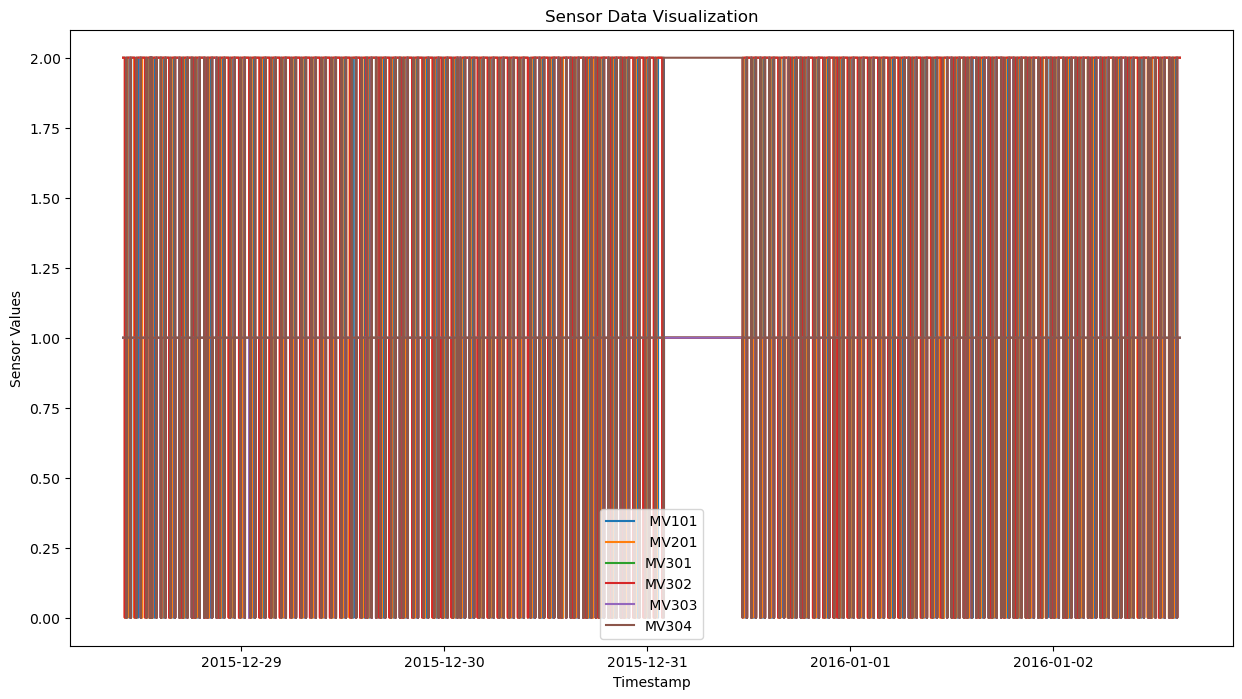

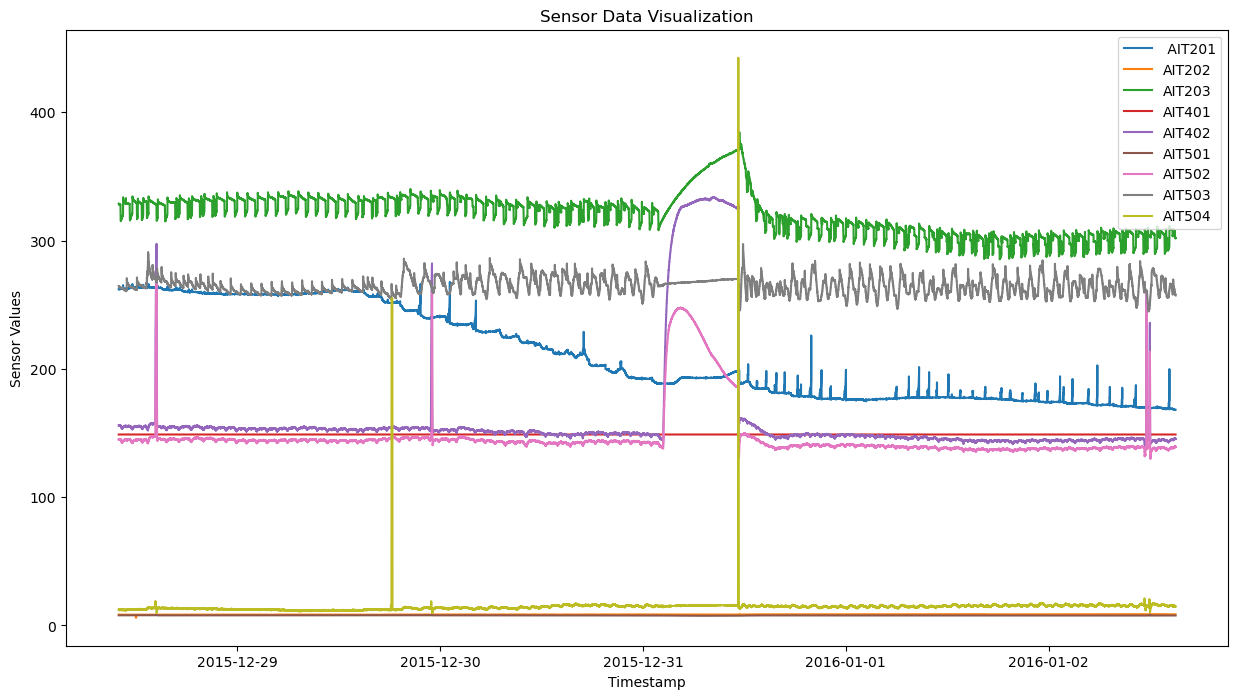

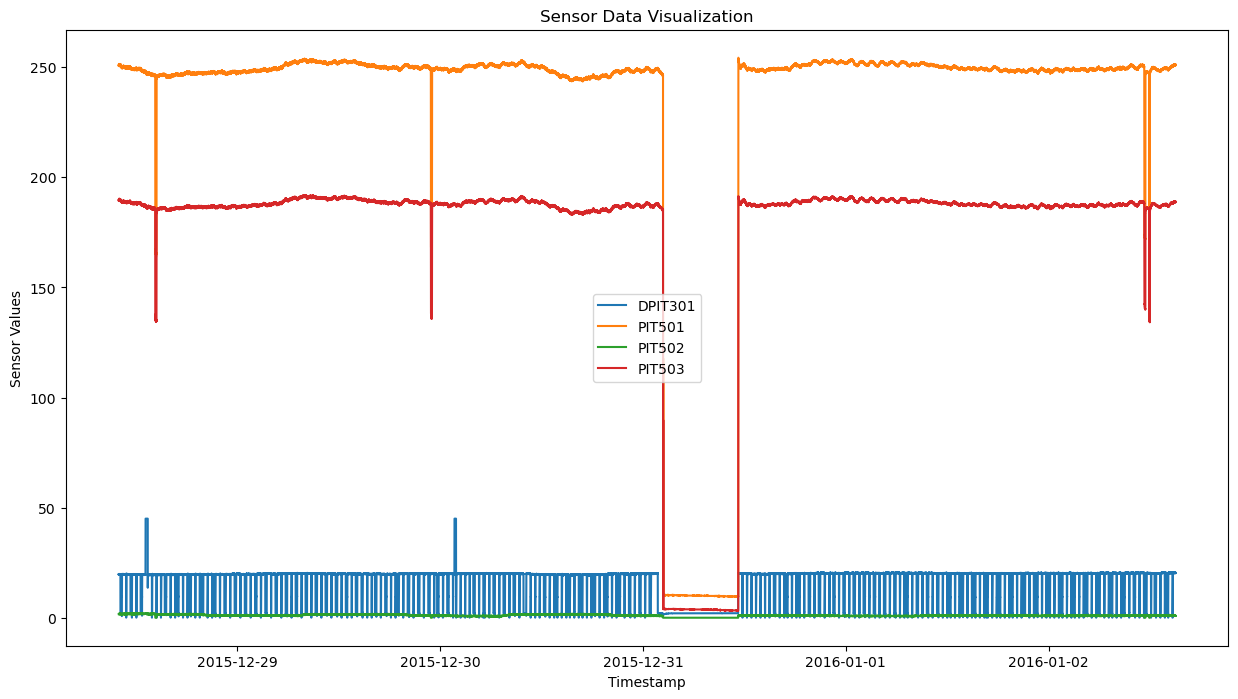

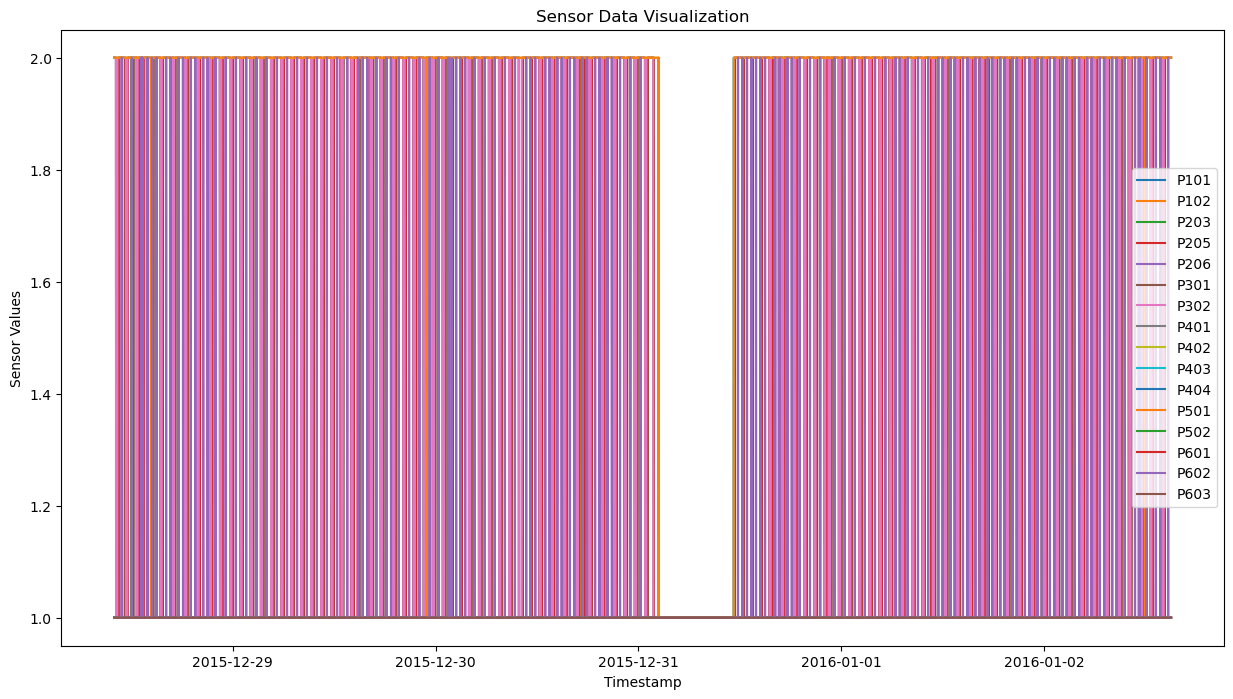

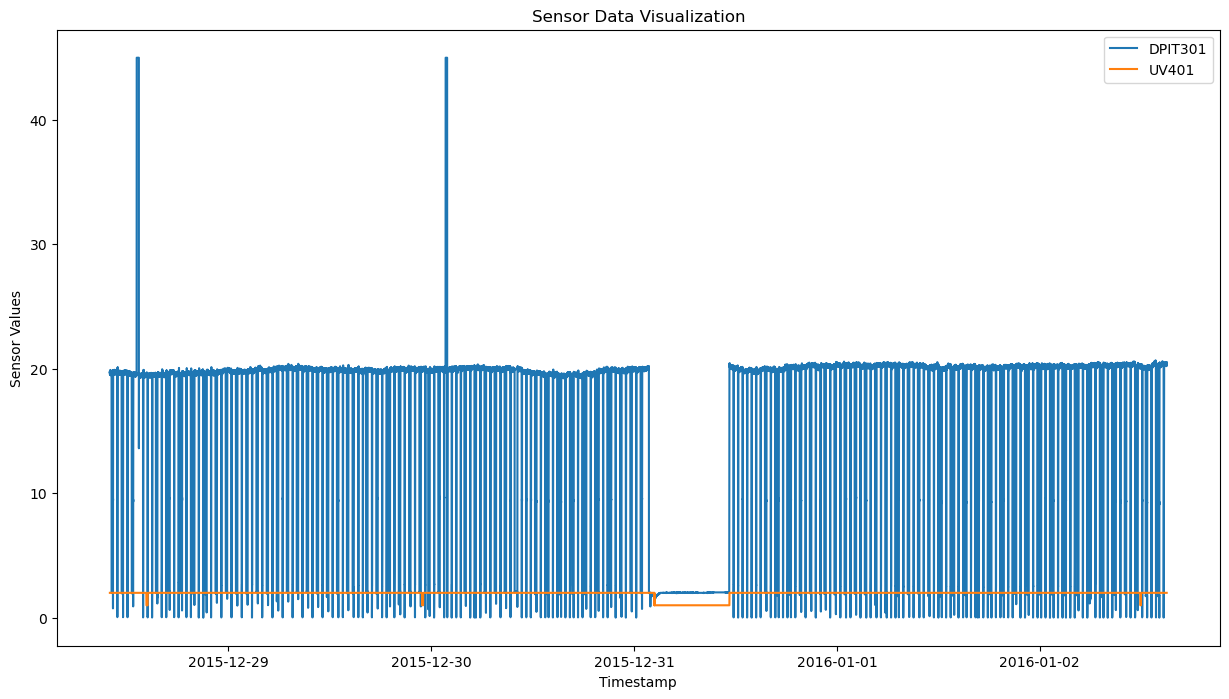

In [7]:
# Graphs for test data

sensors_FIT = [col for col in test_data.columns if 'FIT' in col]
sensors_LIT = [col for col in test_data.columns if 'LIT' in col]
sensors_MV = [col for col in test_data.columns if 'MV' in col]
sensors_AIT = [col for col in test_data.columns if 'AIT' in col]
sensors_PIT = [col for col in test_data.columns if 'PIT' in col]
sensors_P = [col for col in test_data.columns if 'P' in col and len(col) == 4]
sensors_others = ['DPIT301', 'UV401']

visualize_sensor_data(test_data, window=None, sensors=sensors_FIT)
visualize_sensor_data(test_data, window=None, sensors=sensors_LIT)
visualize_sensor_data(test_data, window=None, sensors=sensors_MV)
visualize_sensor_data(test_data, window=None, sensors=sensors_AIT)
visualize_sensor_data(test_data, window=None, sensors=sensors_PIT)
visualize_sensor_data(test_data, window=None, sensors=sensors_P)
visualize_sensor_data(test_data, window=None, sensors=sensors_others)

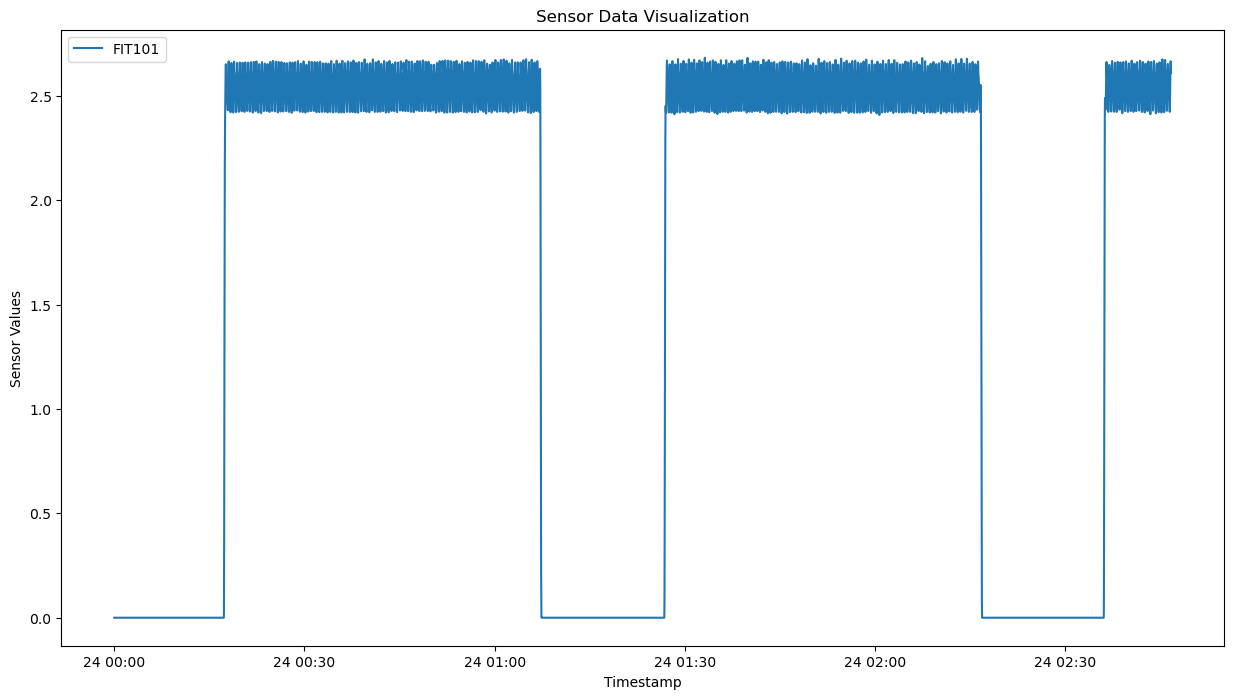

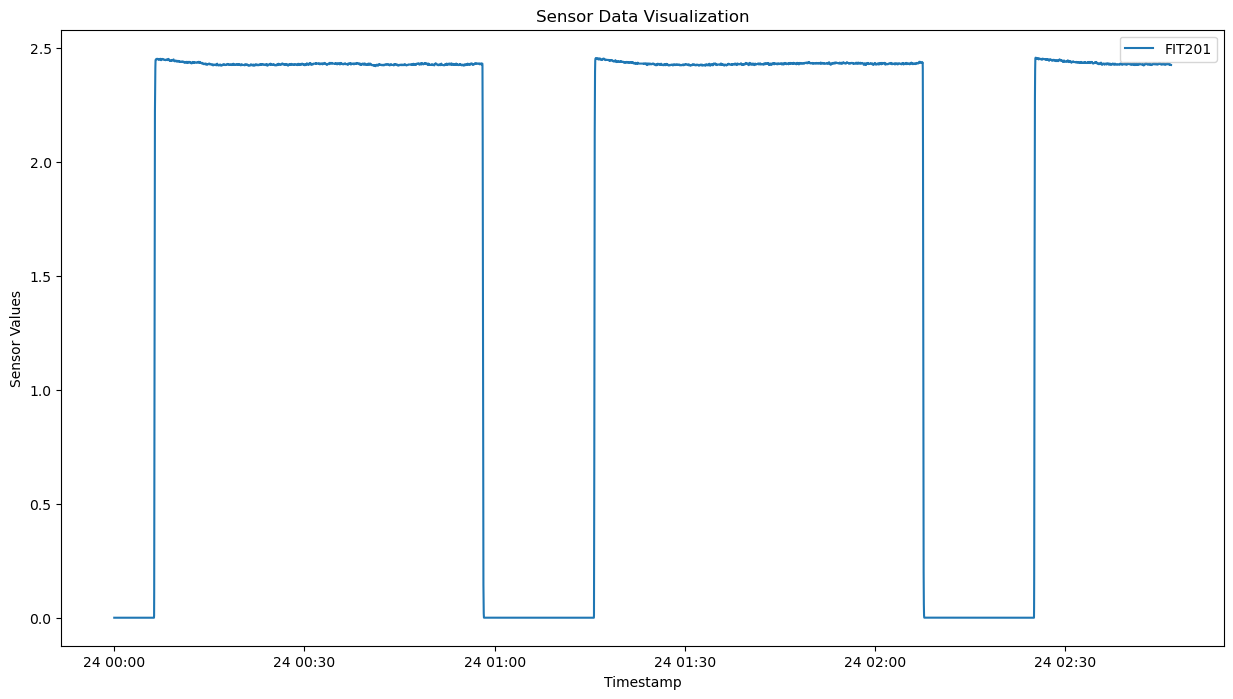

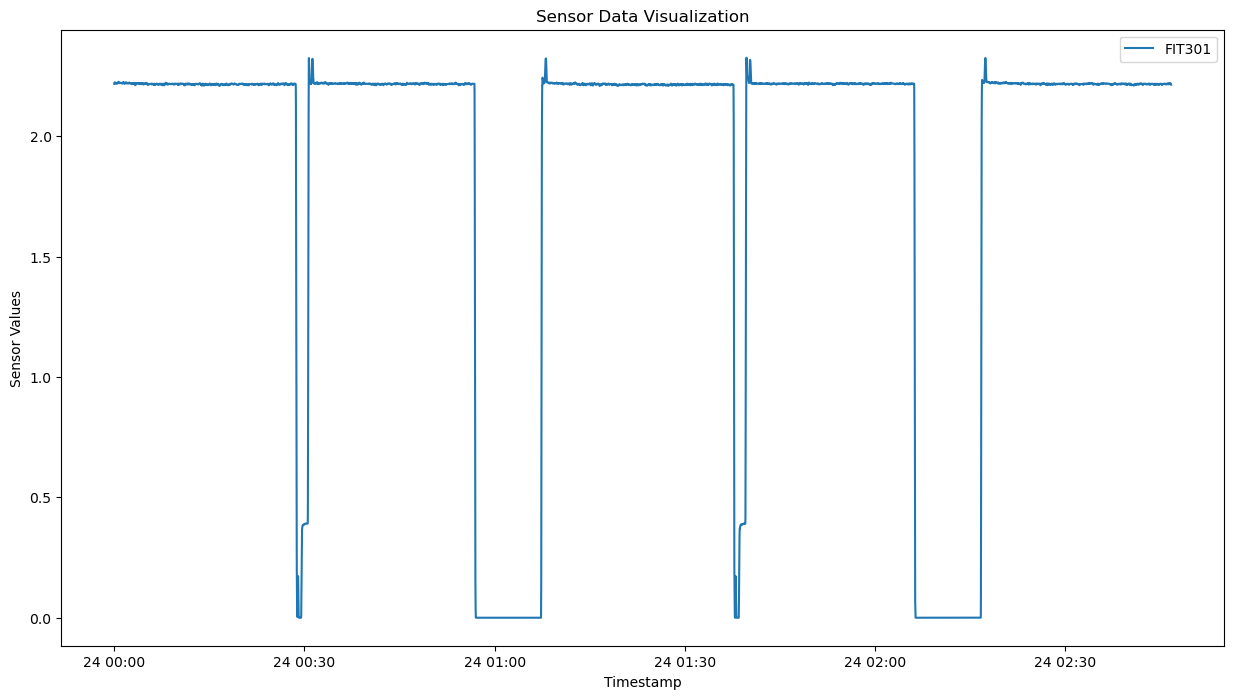

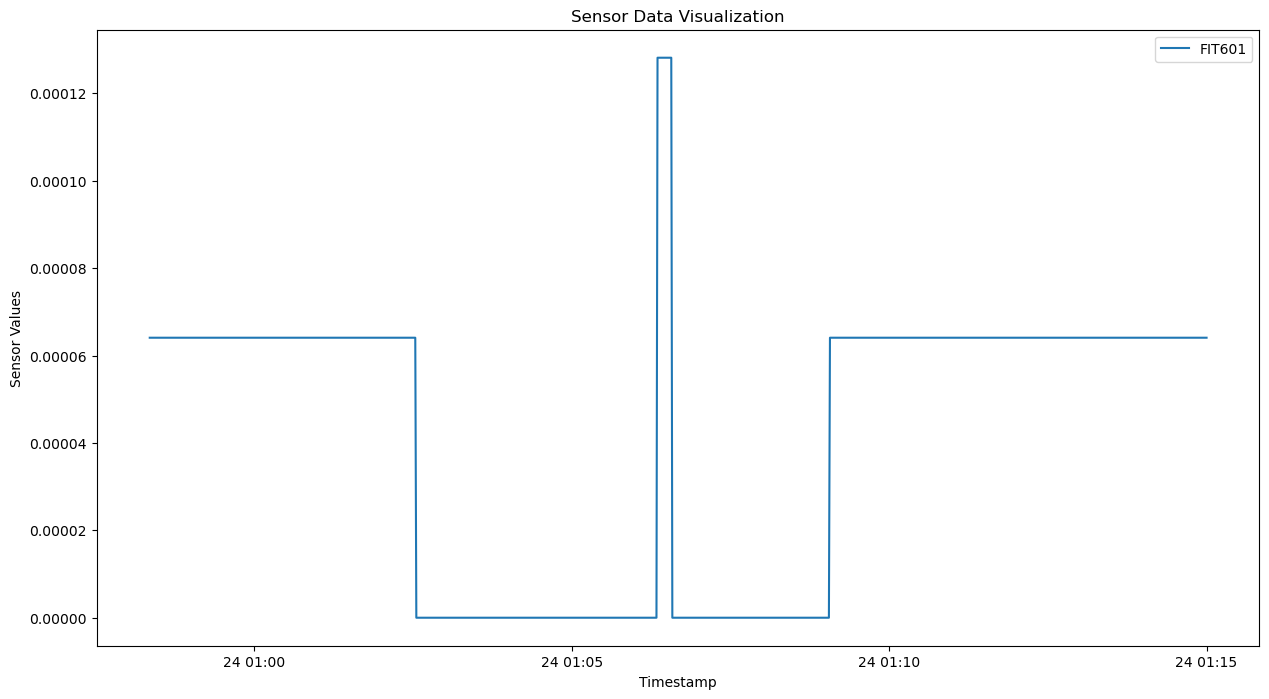

In [8]:
# View FIT101 at a smaller scale to see if there is a pattern
fit101_data = train_data.loc[:, train_data.columns.str.contains('FIT101|Timestamp')]
fit101_data = fit101_data[fit101_data['Timestamp'] > '2015-12-24 00:00:00']
visualize_sensor_data(fit101_data, window=(0, 10000), sensors=['FIT101'])

# View FIT201 at a smaller scale to see if there is a pattern
fit201_data = train_data.loc[:, train_data.columns.str.contains('FIT201|Timestamp')]
fit201_data = fit201_data[fit201_data['Timestamp'] > '2015-12-24 00:00:00']
visualize_sensor_data(fit201_data, window=(0, 10000), sensors=['FIT201'])

# View FIT301 at a smaller scale to see if there is a pattern
fit301_data = train_data.loc[:, train_data.columns.str.contains('FIT301|Timestamp')]
fit301_data = fit301_data[fit301_data['Timestamp'] > '2015-12-24 00:00:00']
visualize_sensor_data(fit301_data, window=(0, 10000), sensors=['FIT301'])

# # View FIT401 at a smaller scale to see if there is a pattern
# fit401_data = train_data.loc[:, train_data.columns.str.contains('FIT401|Timestamp')]
# fit401_data = fit401_data[fit401_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(fit401_data, window=(0, 10000), sensors=['FIT401'])

# # View FIT501 at a smaller scale to see if there is a pattern
# fit501_data = train_data.loc[:, train_data.columns.str.contains('FIT501|Timestamp')]
# fit501_data = fit501_data[fit501_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(fit501_data, window=(0, 10000), sensors=['FIT501'])

# # View FIT502 at a smaller scale to see if there is a pattern
# fit502_data = train_data.loc[:, train_data.columns.str.contains('FIT502|Timestamp')]
# fit502_data = fit502_data[fit502_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(fit502_data, window=(0, 10000), sensors=['FIT502'])

# # View FIT503 at a smaller scale to see if there is a pattern
# fit503_data = train_data.loc[:, train_data.columns.str.contains('FIT503|Timestamp')]
# fit503_data = fit503_data[fit503_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(fit503_data, window=(0, 10000), sensors=['FIT503'])

# # View FIT504 at a smaller scale to see if there is a pattern
# fit504_data = train_data.loc[:, train_data.columns.str.contains('FIT504|Timestamp')]
# fit504_data = fit504_data[fit504_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(fit504_data, window=(0, 10000), sensors=['FIT504'])

# View FIT601 at a smaller scale to see if there is a pattern
fit601_data = train_data.loc[:, train_data.columns.str.contains('FIT601|Timestamp')]
fit601_data = fit601_data[fit601_data['Timestamp'] > '2015-12-24 00:00:00']
visualize_sensor_data(fit601_data, window=(3500, 4500), sensors=['FIT601'])

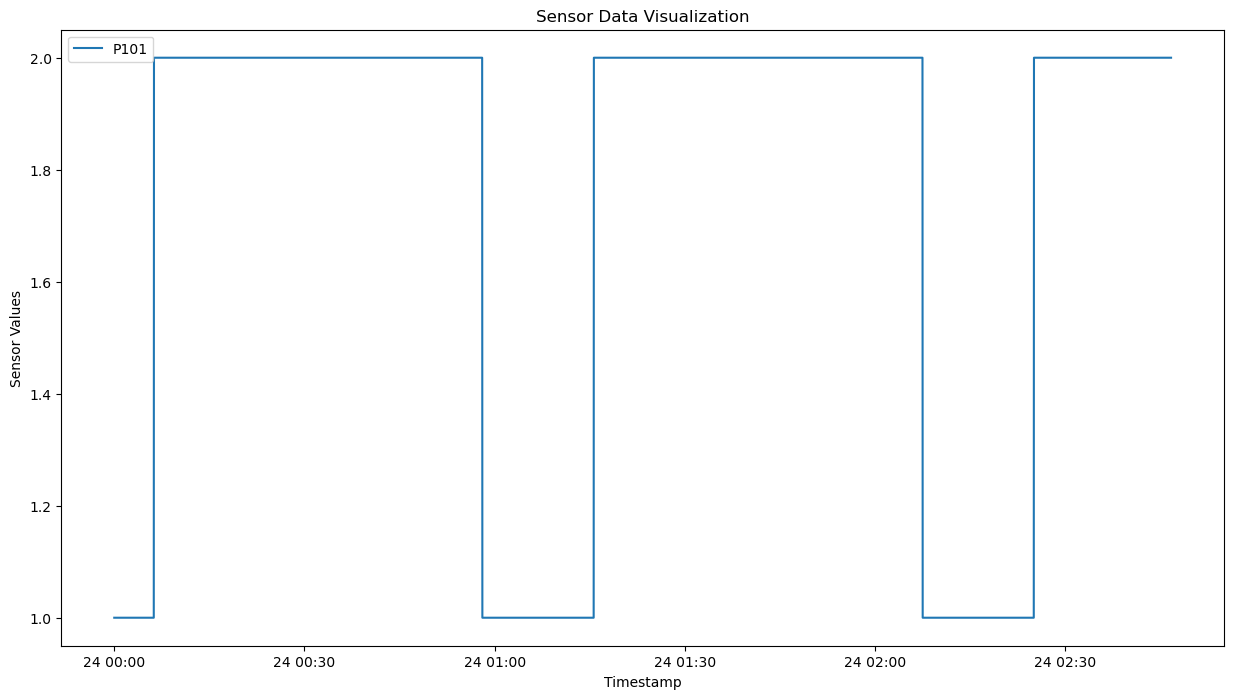

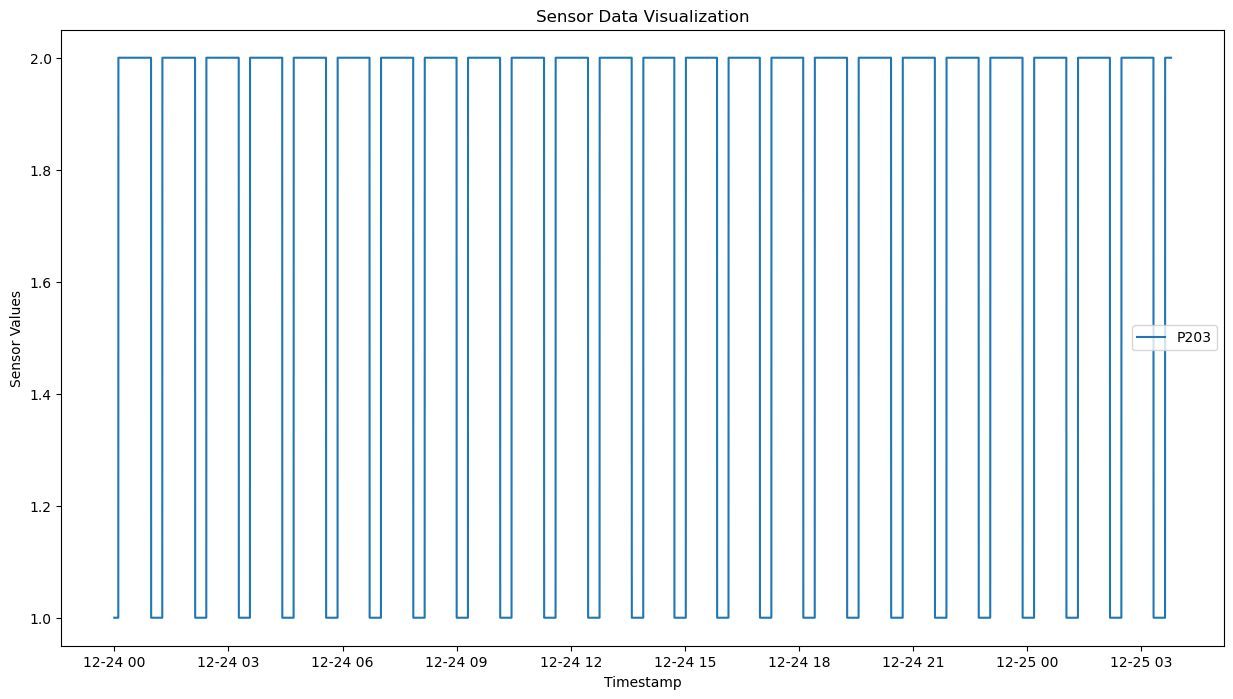

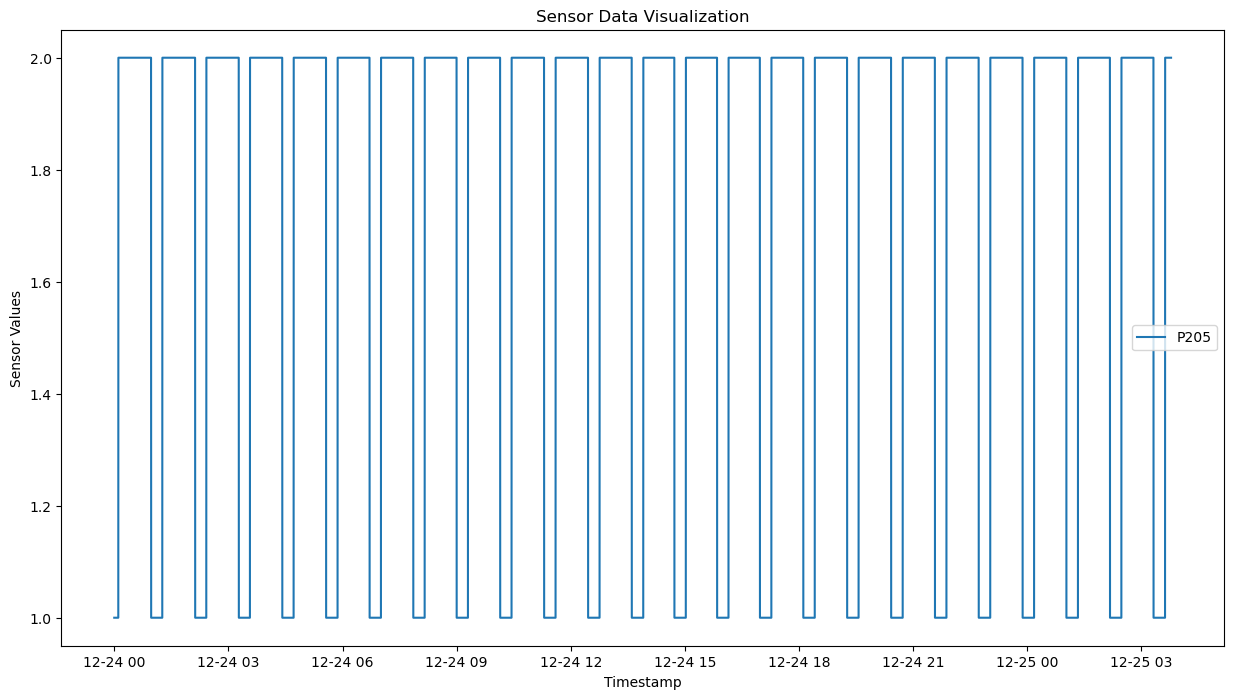

In [9]:
# View P101 at a smaller scale to see if there is a pattern
p101_data = train_data.loc[:, train_data.columns.str.contains('P101|Timestamp')]
p101_data = p101_data[p101_data['Timestamp'] > '2015-12-24 00:00:00']
visualize_sensor_data(p101_data, window=(0, 10000), sensors=['P101'])

# View P102 at a smaller scale to see if there is a pattern
# p102_data = train_data.loc[:, train_data.columns.str.contains('P102|Timestamp')]
# p102_data = p102_data[p102_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(p102_data, window=(0, 100000), sensors=['P102'])

# # View P201 at a smaller scale to see if there is a pattern
# p201_data = train_data.loc[:, train_data.columns.str.contains('P201|Timestamp')]
# p201_data = p201_data[p201_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(p201_data, window=(0, 100000), sensors=['P201'])

# # View P202 at a smaller scale to see if there is a pattern
# p202_data = train_data.loc[:, train_data.columns.str.contains('P202|Timestamp')]
# p202_data = p202_data[p202_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(p202_data, window=(0, 100000), sensors=['P202'])

# View P203 at a smaller scale to see if there is a pattern
p203_data = train_data.loc[:, train_data.columns.str.contains('P203|Timestamp')]
p203_data = p203_data[p203_data['Timestamp'] > '2015-12-24 00:00:00']
visualize_sensor_data(p203_data, window=(0, 100000), sensors=['P203'])

# View P204 at a smaller scale to see if there is a pattern
# p204_data = train_data.loc[:, train_data.columns.str.contains('P204|Timestamp')]
# p204_data = p204_data[p204_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(p204_data, window=(0, 100000), sensors=['P204'])

# View P205 at a smaller scale to see if there is a pattern
p205_data = train_data.loc[:, train_data.columns.str.contains('P205|Timestamp')]
p205_data = p205_data[p205_data['Timestamp'] > '2015-12-24 00:00:00']
visualize_sensor_data(p205_data, window=(0, 100000), sensors=['P205'])

# View P206 at a smaller scale to see if there is a pattern
# p206_data = train_data.loc[:, train_data.columns.str.contains('P206|Timestamp')]
# p206_data = p206_data[p206_data['Timestamp'] > '2015-12-24 00:00:00']
# visualize_sensor_data(p206_data, window=(0, 100000), sensors=['P206'])

After visualising all sensors we can get a better view of their behaviour and correlation. Initially, seperating the sensors by the letters in their labels seemed the most logical, however, there were only a few sensors per group that were similar to eachother. From the visualisation of the data we can also see that almost all sensors have an initial chunk at beginning of the timeframe where the values are abnormal and do not fit the trend of the rest of the data. This chunk does repeat for some sensors, however, I decided to ignore this as it does not provide much useful information and might negatively impact the results, so we will only look at data after the 22nd at 17:00 (after the first ~100000 values). 

1. Most signals just oscillate between values but there seems to be a few distinct types. We can see that most signals per group behave similarly to eachother with a few exceptions and we can also see that some signals behave similarly to signals in other groups. This initial information indicates that sensor labels and types are not necessarily linked. One type of signal just has a constant value that it stays at throughout the entire dataset, examples of this type are signals UV401, PIT502, AIT401, MV304 and P102. Another type of signal is one that has a repeating pattern and stays around the same range, these are signals such as AIT203, AIT503, AIT402, AIT502 and all LIT signals. Similarly to this type there are some signals which also have a cyclic property, however, they resemble a digital signal instead. While the previous signal was continuous and the patterns were analog-like, this type of signal has sudden jumps between values and only holds a few discrete values throughout the entire dataset. Examples of signals that are of this type are MV302, FIT601, P203 and P205. The last distinct type found are signals that shift between two types already mentioned, sometimes they are digital-like and sometimes they osciallate around a value. Examples of this signal are FIT101, FIT201 and FIT301. As we can see in their graphs above, FIT101 and FIT201 are "straight lines" until the signal jumps to a certain value and then oscillates around that value for some time until returning back to 0. FIT301 is similar as it also stays at 0 until it jumps up and oscillates around a value, but it also has the repeating pattern such as the other signal type. Lastly there are a couple signals that do not stick to a certain behaviour and have sporadic behaviour, such as FIT401.

2. As stated previously, some signals are correlated between their own label types and also with other signals. From the graphs of the whole dataset we can see that for example AIT401 and AIT502 behave very similarly, PIT501 and PIT503 as well, and all of LIT also. These groups look strongly correlated between eachother as they rise and dip at the same time as eachother. We can also see from the data visualisation that almost all signals have this abnormality at the beginning of the data as well as some signals have visual anomalies (oddly placed peaks or dips) at around the same place. This tells us that if there is an anomaly at some point in a signal, other signals will also have an anomaly near that time. Most signals do show cyclic behaviour, some more clearly than others. Most digital-like signals have an easily observable cycle as well as the signals with the repeating pattern.

# DTW-based anomaly detection

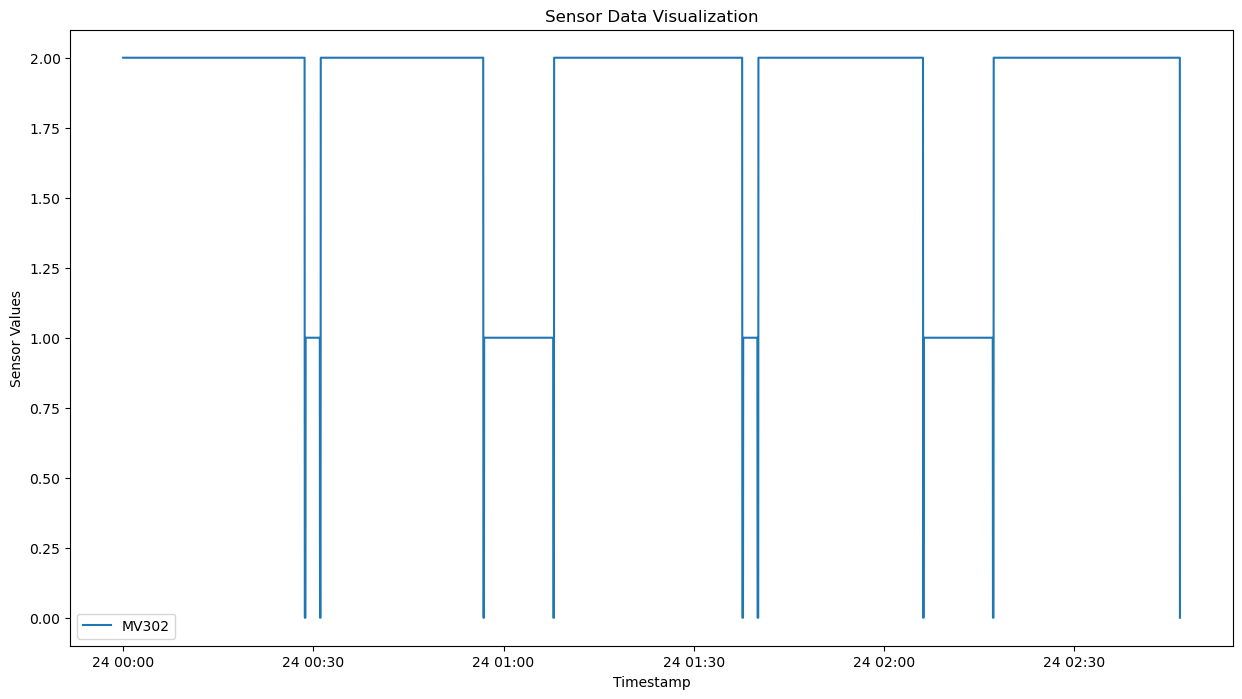

                 Timestamp  MV302
115201 2015-12-24 00:00:01      2
115202 2015-12-24 00:00:02      2
115203 2015-12-24 00:00:03      2
115204 2015-12-24 00:00:04      2
115205 2015-12-24 00:00:05      2
...                    ...    ...
496795 2015-12-28 09:59:55      2
496796 2015-12-28 09:59:56      2
496797 2015-12-28 09:59:57      2
496798 2015-12-28 09:59:58      2
496799 2015-12-28 09:59:59      2

[381599 rows x 2 columns]


In [10]:
# ----- DTW-based anomaly detection -----

def dynamic_time_warping(a, b):
    n = a.size
    m = b.size
    
    dtw_distance = np.inf
    
    # START ANSWER
    def e_dist(x, y):
        return (x - y) ** 2
    
    mem = np.full((n, m), np.inf)
    mem[0, 0] = e_dist(a[0], b[0])

    for i in range(1, n):
        mem[i, 0] = mem[i - 1, 0] + e_dist(a[i], b[0])

    for j in range(1, m):
        mem[0, j] = mem[0, j - 1] + e_dist(a[0], b[j])

    for i in range(1, n):
        for j in range(1, m):
            mem[i, j] = e_dist(a[i], b[j]) + min(mem[i - 1, j], mem[i, j - 1], mem[i - 1, j - 1])

    dtw_distance = np.sqrt(mem[n - 1, m - 1])
    # END ANSWER

    return dtw_distance

# After visualising each signal at a smaller scale
# I picked MV302 as it has a repeating pattern that seems easier to detect and train on
# and it does not oscillate too much long term (ignoring the initial chunk)
# I picked a sample size of 10000 as it was a reasonable size to train on but not too large that it would run for too long
# and it was the size of about 2.5 times of the repeating pattern
# The sample will be taken from after the initial chunk of data as it is not representative of the rest of the data (after the 24th)

dtw_train_data = train_data.loc[:, train_data.columns.str.contains('MV302|Timestamp')]
dtw_train_data = dtw_train_data[dtw_train_data['Timestamp'] > '2015-12-24 00:00:00'] # Ignore initial chunk of data

visualize_sensor_data(dtw_train_data, window=(0, 10000), sensors=['MV302'])
print(dtw_train_data)

# Get the sample data and drop Timestamp
dtw_train_data = dtw_train_data.iloc[:10000, :]
dtw_train_data = dtw_train_data.drop(columns=['Timestamp'])

# create sliding windows of the training data, with a stride of 1000 and a window size of 1000
window_size = 1000
window_stride = 1000
sliding_windows = np.lib.stride_tricks.sliding_window_view(dtw_train_data.values.reshape(-1), window_size, subok=False)[::window_stride]

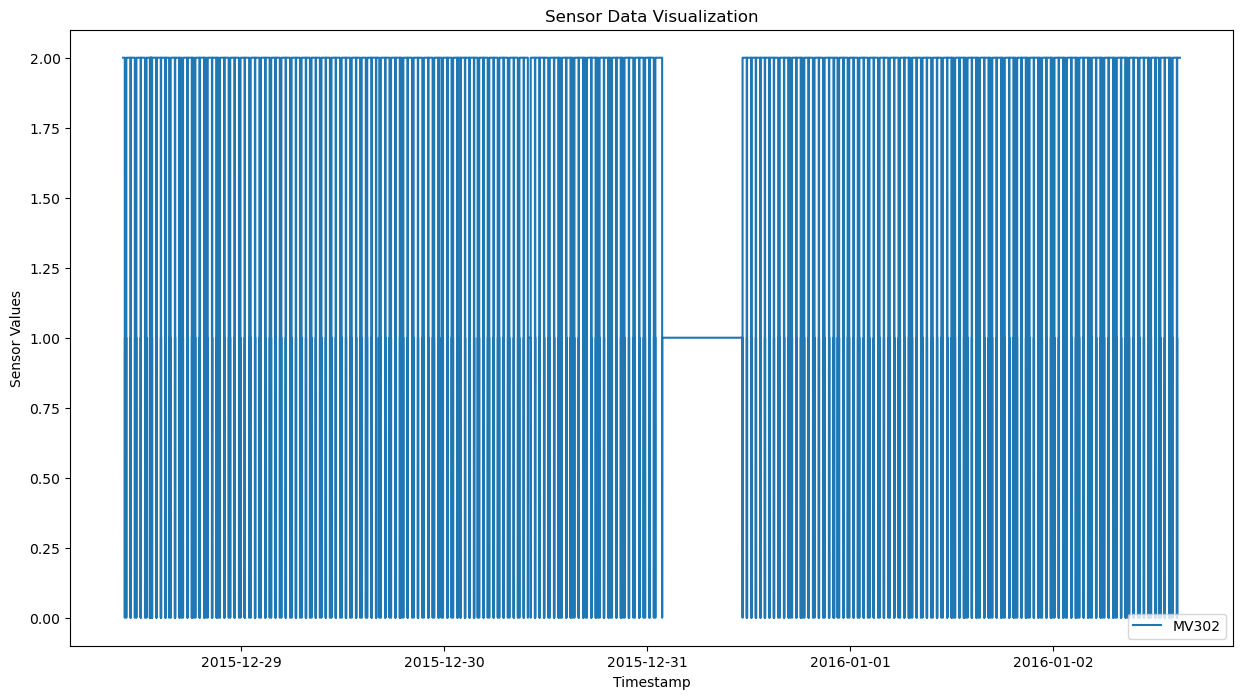

In [11]:
visualize_sensor_data(test_data, window=None, sensors=['MV302'])

dtw_test_data = test_data['MV302']

# ---- Would have do it as follows (commented out to allow for the whole notebook to run)

distances = []
for window in sliding_windows:
    distances.append(dynamic_time_warping(dtw_test_data.values, window))

print(distances)

# Function to plot distances
def plot_distances(distances, title):
    plt.plot(distances, label='Distances')
    plt.title('Distances for MV302')
    plt.xlabel('Test Data Point')
    plt.ylabel('DTW Distance')
    plt.legend()
    plt.show()

After visualising each signal at a smaller scale, I picked MV302 as it has a repeating pattern that seems easier to detect and train on and it does not oscillate too much long term (ignoring the initial chunk). Another good option would have been PIT501 as it visually shows more anomalies which could indicate that more anomalies would be detected from the whole dataset. Yet, I choose MV302 as its repeating pattern was smaller that the pattern in PIT501 and therefore could be trained on more easily. I picked a sample size of 10000 as it was a reasonable size to train on but not too large that it would run for too long and it has the size of about 2.5 times of the repeating pattern. The sample will be taken from after the initial chunk of data as it is not representative of the rest of the data (after the 24th). For the sliding windows, I picked a window size of 1000 and stride of 1000 which meant that i would have 10 windows with no overlaps as that did not seem necessary. Unfortunately, I could not get the residuals from the test data as the code above (and other versions of it) were unable to run, however, I suspect that most residuals would be normal except for the gap after 2015-12-31 as seen above. Using DTW distances in this manner I expect it to detect best point anomalies because DTW accounts for variations in sequential alignments, making it sensitive to local differences. Still, I expect DTW to also perform well in detecting contextual and collective anomalies as the sliding windows and the training data provide a context to compare values against, especially for the signals that have a repeating pattern. Furthermore, the dataset is sequential, which inherently provides context for the data.

# PCA-based anomaly detection 

In [ ]:
# ---- PCA-based anomaly detection -----

def principal_component_analysis(df, k):
    eigenvectors = np.zeros(shape=(df.shape[1], k))

    # START ANSWER
    covariance = np.cov(df.values, rowvar=False)

    eigenvals, eigenvects = np.linalg.eigh(covariance)

    idx = eigenvals.argsort()[::-1]
    eigenvects = eigenvects[:,idx]

    eigenvectors = eigenvects[:, :k]

    # END ANSWER

    return eigenvectors
    

def apply_principal_component_analysis(df, eigenvectors):
    projected_data = np.zeros(shape=(df.shape[0], eigenvectors.shape[1]))

    # START ANSWER
    projected_data = np.dot(df.values, eigenvectors)
    projected_data = projected_data - np.mean(projected_data, axis=0)
    # END ANSWER

    return pd.DataFrame(projected_data)



[[  2.470294 261.5804     2.       ...   1.         1.         1.      ]
 [  2.457163 261.1879     2.       ...   1.         1.         1.      ]
 [  2.439548 260.9131     2.       ...   1.         1.         1.      ]
 ...
 [  2.434744 522.886      2.       ...   1.         1.         1.      ]
 [  2.428338 522.9252     2.       ...   1.         1.         1.      ]
 [  2.427057 522.8467     2.       ...   1.         1.         1.      ]]


/tmp/ipykernel_709681/255639655.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (projected_data.iloc[i][j] - pca_data.iloc[i][j]) ** 2
/tmp/ipykernel_709681/255639655.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_709681/255639655.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


                 0           1          2           3           4
0       909.042079 -227.861749 -97.175708 -162.268329  167.790861
1       909.212972 -227.502015 -97.191545 -162.292847  167.788586
2       909.397801 -227.315562 -97.202958 -162.397013  167.758592
3       909.762407 -226.768513 -97.257530 -162.308234  167.755778
4       909.936776 -226.364483 -97.296387 -162.147258  167.774561
...            ...         ...        ...         ...         ...
496795  -40.881961   99.673817 -22.470494  -12.748565    7.843997
496796  -40.944301   99.830284 -22.469058  -12.739200    8.021372
496797  -41.035999  100.011709 -22.369616  -12.658658    8.003463
496798  -41.106202   99.930398 -22.336237  -12.968807    7.987653
496799  -41.105491  100.044552 -22.339511  -12.866160    7.934238

[496800 rows x 5 columns]


/tmp/ipykernel_709681/255639655.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


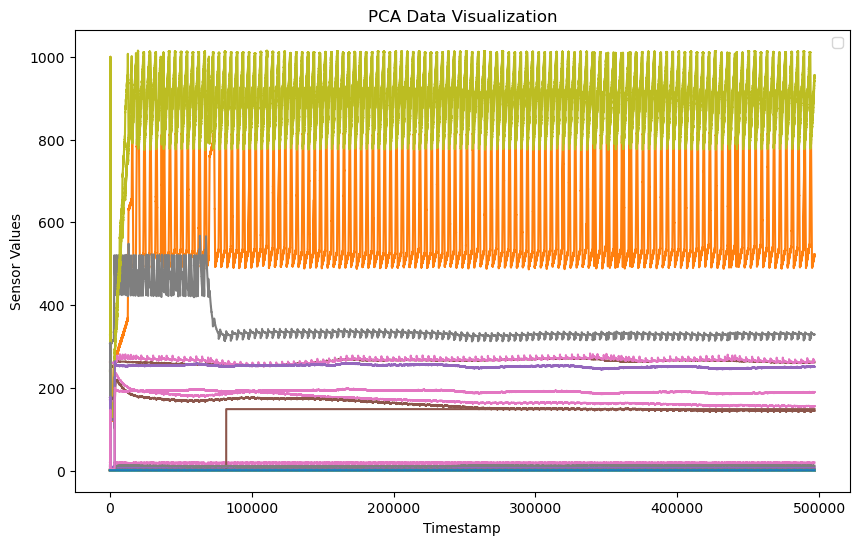

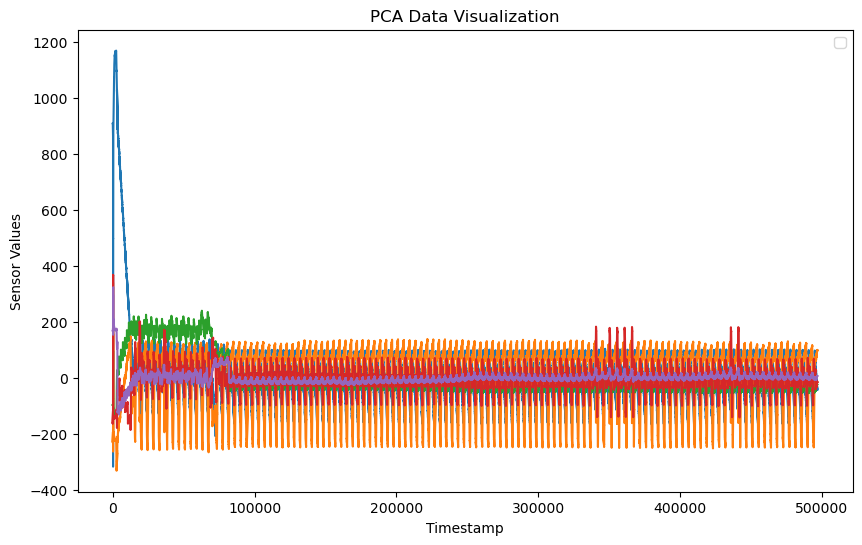

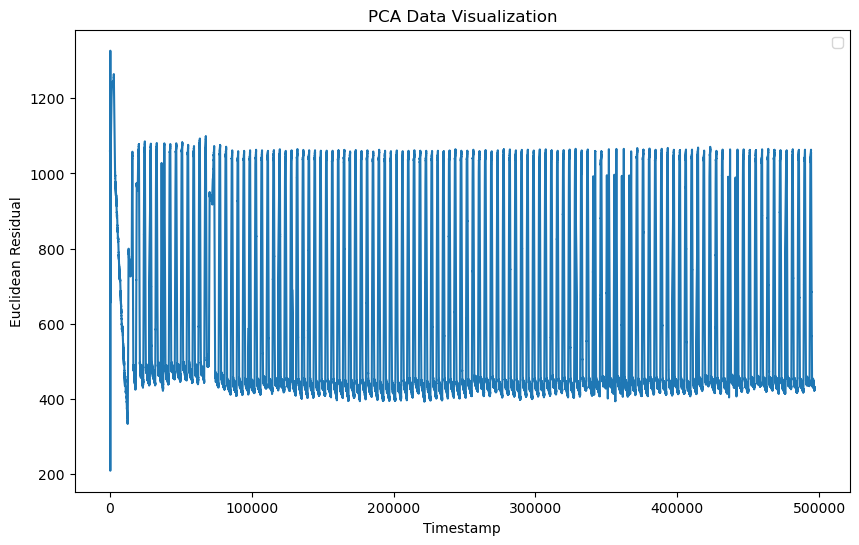

In [ ]:
# drop Timestamp and Normal/Attack columns as they are not needed
pca_data = train_data.drop(columns=['Timestamp', 'Normal/Attack'])
print(pca_data.values)


def perform_pca(training_data, testing_data, component_count):

    pcas = principal_component_analysis(training_data, component_count)

    projected_data = apply_principal_component_analysis(testing_data, pcas)

    residuals = np.zeros(shape=(projected_data.shape[0], 1))

    # calculate residuals
    for i in range (projected_data.shape[0]):
        
        sum = 0
        
        for j in range (projected_data.iloc[i].shape[0]):
            sum += (projected_data.iloc[i][j] - pca_data.iloc[i][j]) ** 2
        
        residuals[i] = np.sqrt(sum)


    return pcas, projected_data, residuals


pcas, projected_data, residuals = perform_pca(pca_data, pca_data, 5)

# Plot training data
plt.figure(figsize=(10, 6))
plt.plot(pca_data)
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.title('PCA Data Visualization')
plt.legend()

print(projected_data)

# Plot projected training data
plt.figure(figsize=(10, 6))
plt.plot(projected_data)
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.title('PCA Data Visualization')
plt.legend()
    
# Plot training data residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel('Timestamp')
plt.ylabel('Euclidean Residual')
plt.title('PCA Data Visualization')
plt.legend()


In [ ]:
# Remove abnormalities from the training data
# There is large abnormalities in the first ~100000 values and some abnormalities around 350000 and a few around 450000 as we can see from the graphs above.
# This might be unfavorable and therefore I decided to only use values between 100000-300000 
# as these appear to be fine and there are still enough values to have a good representative of normal data

# extract values between 100000 and 300000 from the training data
updated_pca_data = pca_data.iloc[100000:300000, :]

/tmp/ipykernel_709681/255639655.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += (projected_data.iloc[i][j] - pca_data.iloc[i][j]) ** 2
/tmp/ipykernel_709681/3462572342.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_709681/3462572342.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_709681/3462572342.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt

/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/nix/store/4vmqc642fjam58ap7zpkg38hmaj2nyha-python3.12-ipython-8.29.0/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


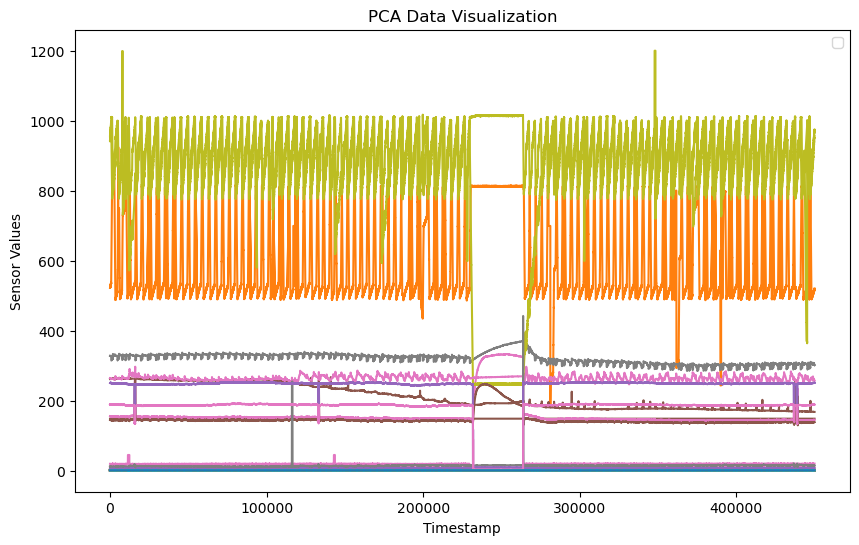

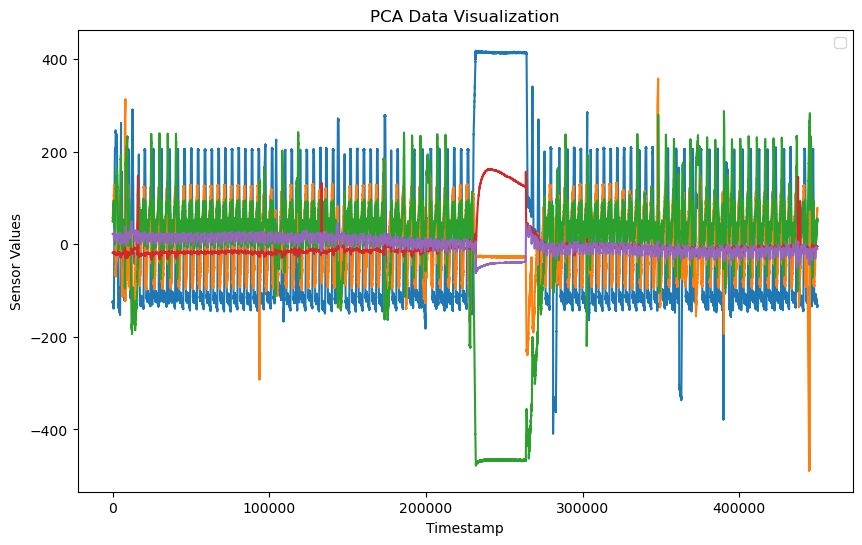

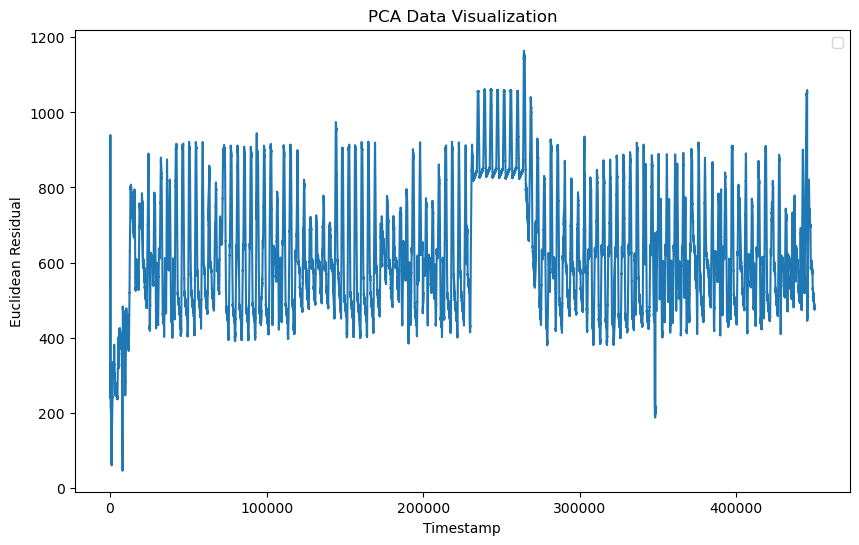

In [ ]:
pca_test_data = test_data.drop(columns=['Timestamp', 'Normal/Attack'])

test_pca, projected_test_data, test_residuals = perform_pca(updated_pca_data, pca_test_data, 5)

# plot test data
plt.figure(figsize=(10, 6))
plt.plot(pca_test_data)
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.title('PCA Data Visualization')
plt.legend()

# plot projected test data
plt.figure(figsize=(10, 6))
plt.plot(projected_test_data)
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.title('PCA Data Visualization')
plt.legend()

# plot test data residuals
plt.figure(figsize=(10, 6))
plt.plot(test_residuals)
plt.xlabel('Timestamp')
plt.ylabel('Euclidean Residual')
plt.title('PCA Data Visualization')
plt.legend()

In [ ]:
# threshold is values above 1000 and values below 400
# get the index of the anomalies
anomalies = np.where((test_residuals > 1000) | (test_residuals < 400))[0]

# get the values from the test data that are anomalies
anomalies_data = test_data.iloc[anomalies, :]
print(anomalies_data)

                 Timestamp    FIT101    LIT101   MV101  P101  P102    AIT201  \
0      2015-12-28 10:00:00  2.427057  522.8467       2     2     1  262.0161   
1      2015-12-28 10:00:01  2.446274  522.8860       2     2     1  262.0161   
2      2015-12-28 10:00:02  2.489191  522.8467       2     2     1  262.0161   
3      2015-12-28 10:00:03  2.534350  522.9645       2     2     1  262.0161   
4      2015-12-28 10:00:04  2.569260  523.4748       2     2     1  262.0161   
...                    ...       ...       ...     ...   ...   ...       ...   
445186 2016-01-02 13:41:07  2.534670  524.1028       2     2     1  168.8990   
445187 2016-01-02 13:41:08  2.517055  524.2206       2     2     1  168.8990   
445188 2016-01-02 13:41:09  2.502322  524.2206       2     2     1  168.8990   
445189 2016-01-02 13:41:10  2.482465  524.2991       2     2     1  168.8990   
445190 2016-01-02 13:41:11  2.469654  524.2206       2     2     1  168.8990   

          AIT202    AIT203    FIT201  .

After applying pca to the training data, we can spot some strange behaviour. There are large abnormalities in the first ~100000 values and some abnormalities around 350000 and a few around 450000 as we can see from the graphs above. This might be unfavorable and therefore I decided to only use values between 100000-300000 as these appear to be fine and there are still enough values to have a good representative of normal data. The large first abnormality could be explained by the initial chunk of training data that is also abnormal, since the data itself is abnormal, the residuals of the projected data will also be abnormal as this chunk does not conform to the rest of the data. As for the other abnormalities they are harder to explain as they do not appear in the original data. From the graphs of the test pca data, we can see that there a few values that spread past the normal range. These we consider anomalies, and after a few runs I decided to make the threshold for anomalies as values that have a residual of above 1000 or below 400.

In [ ]:
# ---- Kaggle Submission -----

# Create a new column in the test data to mark anomalies
kaggle_test_data = test_data.drop(columns=['Timestamp', 'Normal/Attack'])
kaggle_test_data['ID'] = kaggle_test_data.index
kaggle_test_data['Attack/Normal'] = 0
kaggle_test_data.loc[anomalies, 'Attack/Normal'] = 1

print(kaggle_test_data)

submission = kaggle_test_data[['ID', 'Attack/Normal']]
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created.")

          FIT101    LIT101   MV101  P101  P102    AIT201    AIT202    AIT203  \
0       2.427057  522.8467       2     2     1  262.0161  8.396437  328.6337   
1       2.446274  522.8860       2     2     1  262.0161  8.396437  328.6337   
2       2.489191  522.8467       2     2     1  262.0161  8.394514  328.6337   
3       2.534350  522.9645       2     2     1  262.0161  8.394514  328.6337   
4       2.569260  523.4748       2     2     1  262.0161  8.394514  328.6337   
...          ...       ...     ...   ...   ...       ...       ...       ...   
449914  2.559972  519.5495       2     2     1  168.0979  8.638683  301.9226   
449915  2.549082  520.4131       2     2     1  168.0979  8.638683  301.9226   
449916  2.531467  520.6878       2     2     1  168.0979  8.638683  301.9226   
449917  2.521218  520.7271       2     2     1  168.0979  8.638683  301.9226   
449918  2.501681  521.1196       2     2     1  168.0979  8.638683  301.9226   

          FIT201   MV201  ...  P502    